# Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset - https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [2]:
"""
The data-set aims to answer the following key questions:

Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
How does Infant and Adult mortality rates affect life expectancy?
Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
What is the impact of schooling on the lifespan of humans?
Does Life Expectancy have positive or negative relationship with drinking alcohol?
Do densely populated countries tend to have lower life expectancy?
What is the impact of Immunization coverage on life Expectancy?

"""

'\nThe data-set aims to answer the following key questions:\n\nDoes various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?\nShould a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?\nHow does Infant and Adult mortality rates affect life expectancy?\nDoes Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.\nWhat is the impact of schooling on the lifespan of humans?\nDoes Life Expectancy have positive or negative relationship with drinking alcohol?\nDo densely populated countries tend to have lower life expectancy?\nWhat is the impact of Immunization coverage on life Expectancy?\n\n'

In [3]:
data = pd.read_csv('Life Expectancy Data.csv')
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

# Sanity Check

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
data.describe().T

count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life expectancy                  2928.0  6.922493e+01  9.523867e+00   
Adult Mortality                  2928.0  1.647964e+02  1.242921e+02   
infant deaths                    2938.0  3.030395e+01  1.179265e+02   
Alcohol                          2744.0  4.602861e+00  4.052413e+00   
percentage expenditure           2938.0  7.382513e+02  1.987915e+03   
Hepatitis B                      2385.0  8.094046e+01  2.507002e+01   
Measles                          2938.0  2.419592e+03  1.146727e+04   
 BMI                             2904.0  3.832125e+01  2.004403e+01   
under-five deaths                2938.0  4.203574e+01  1.604455e+02   
Polio                            2919.0  8.255019e+01  2.342805e+01   
Total expenditure                2712.0  5.938190e+00  2.498320e+00   
Diphtheria                       2919.0  8.232408e+01  2.371691e+01   
 HIV/AIDS                        2938.0  1.742103e+00  5.077785e+00   
GDP                              2490.0  7.483158e+03  1.427017e+04   
Population                       2286.0  1.275338e+07  6.101210e+07   
 thinness  1-19 years            2904.0  4.839704e+00  4.420195e+00   
 thinness 5-9 years              2904.0  4.870317e+00  4.508882e+00   
Income composition of resources  2771.0  6.275511e-01  2.109036e-01   
Schooling                        2775.0  1.199279e+01  3.358920e+00   

                                        min            25%           50%  \
Year                             2000.00000    2004.000000  2.008000e+03   
Life expectancy                    36.30000      63.100000  7.210000e+01   
Adult Mortality                     1.00000      74.000000  1.440000e+02   
infant deaths                       0.00000       0.000000  3.000000e+00   
Alcohol                             0.01000       0.877500  3.755000e+00   
percentage expenditure              0.00000       4.685343  6.491291e+01   
Hepatitis B                         1.00000      77.000000  9.200000e+01   
Measles                             0.00000       0.000000  1.700000e+01   
 BMI                                1.00000      19.300000  4.350000e+01   
under-five deaths                   0.00000       0.000000  4.000000e+00   
Polio                               3.00000      78.000000  9.300000e+01   
Total expenditure                   0.37000       4.260000  5.755000e+00   
Diphtheria                          2.00000      78.000000  9.300000e+01   
 HIV/AIDS                           0.10000       0.100000  1.000000e-01   
GDP                                 1.68135     463.935626  1.766948e+03   
Population                         34.00000  195793.250000  1.386542e+06   
 thinness  1-19 years               0.10000       1.600000  3.300000e+00   
 thinness 5-9 years                 0.10000       1.500000  3.300000e+00   
Income composition of resources     0.00000       0.493000  6.770000e-01   
Schooling                           0.00000      10.100000  1.230000e+01   

                                          75%           max  
Year                             2.012000e+03  2.015000e+03  
Life expectancy                  7.570000e+01  8.900000e+01  
Adult Mortality                  2.280000e+02  7.230000e+02  
infant deaths                    2.200000e+01  1.800000e+03  
Alcohol                          7.702500e+00  1.787000e+01  
percentage expenditure           4.415341e+02  1.947991e+04  
Hepatitis B                      9.700000e+01  9.900000e+01  
Measles                          3.602500e+02  2.121830e+05  
 BMI                             5.620000e+01  8.730000e+01  
under-five deaths                2.800000e+01  2.500000e+03  
Polio                            9.700000e+01  9.900000e+01  
Total expenditure                7.492500e+00  1.760000e+01  
Diphtheria                       9.700000e+01  9.900000e+01  
 HIV/AIDS                        8.000000e-01  5.060000e+01  
GDP            

In [6]:
data.columns = data.columns.str.replace(' ', '_')
data.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy_', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles_', '_BMI_', 'under-five_deaths_', 'Polio', 'Total_expenditure',
       'Diphtheria_', '_HIV/AIDS', 'GDP', 'Population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [7]:
data.columns = data.columns.str.rstrip('_')
data.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', '_BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', '_HIV/AIDS', 'GDP', 'Population', '_thinness__1-19_years',
       '_thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [8]:
data.columns = data.columns.str.strip('_')
data.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [9]:
num_cols = data.columns[data.dtypes != 'object']
cat_cols = data.columns[data.dtypes == 'object']

"""
num_cols = data.dtypes[data.dtypes != 'object'].index
cat_cols = data.dtypes[data.dtypes == 'object'].index"""

"\nnum_cols = data.dtypes[data.dtypes != 'object'].index\ncat_cols = data.dtypes[data.dtypes == 'object'].index"

In [10]:
num_cols

Index(['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [11]:
cat_cols

Index(['Country', 'Status'], dtype='object')

In [12]:
for i in num_cols:
  print(i, data[i].nunique())
  #print(data[i].unique())
  print('******')

Year 16
******
Life_expectancy 362
******
Adult_Mortality 425
******
infant_deaths 209
******
Alcohol 1076
******
percentage_expenditure 2328
******
Hepatitis_B 87
******
Measles 958
******
BMI 608
******
under-five_deaths 252
******
Polio 73
******
Total_expenditure 818
******
Diphtheria 81
******
HIV/AIDS 200
******
GDP 2490
******
Population 2278
******
thinness__1-19_years 200
******
thinness_5-9_years 207
******
Income_composition_of_resources 625
******
Schooling 173
******


In [13]:
for i in cat_cols:
  print(i, data[i].nunique())
  #print(data[i].unique())
  print('******')

Country 193
******
Status 2
******


In [14]:
def hist_box_plot(data, col):
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.histplot(data=data, x=col, kde=True)
  plt.subplot(1,2,2)
  sns.boxplot(data=data, x=col)
  plt.show()

In [15]:
num_cols

Index(['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [16]:
num_cols = num_cols.drop('Life_expectancy')
num_cols

Index(['Year', 'Adult_Mortality', 'infant_deaths', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [17]:
num_cols = num_cols.drop('Year')
num_cols

Index(['Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure',
       'Hepatitis_B', 'Measles', 'BMI', 'under-five_deaths', 'Polio',
       'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness__1-19_years', 'thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

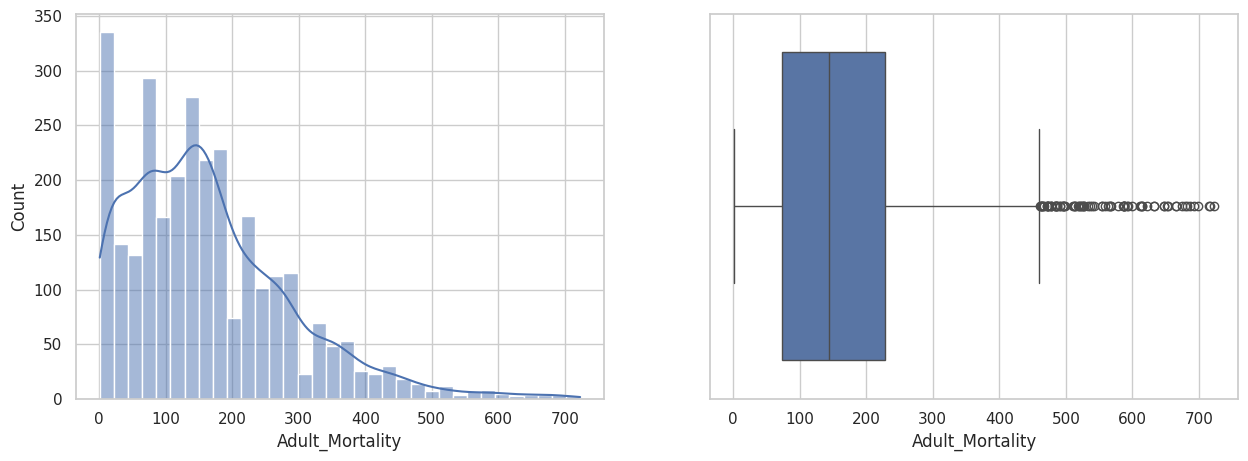

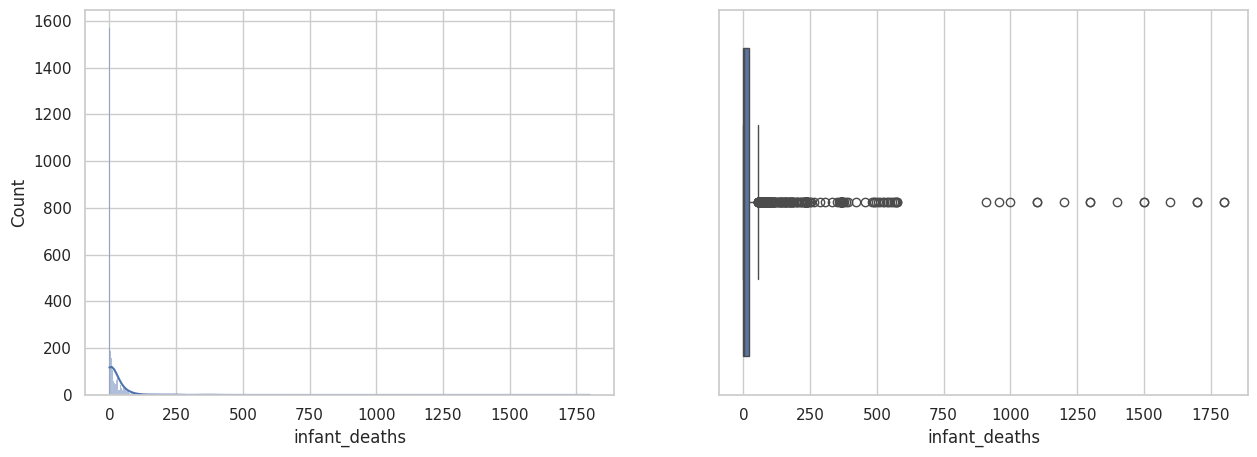

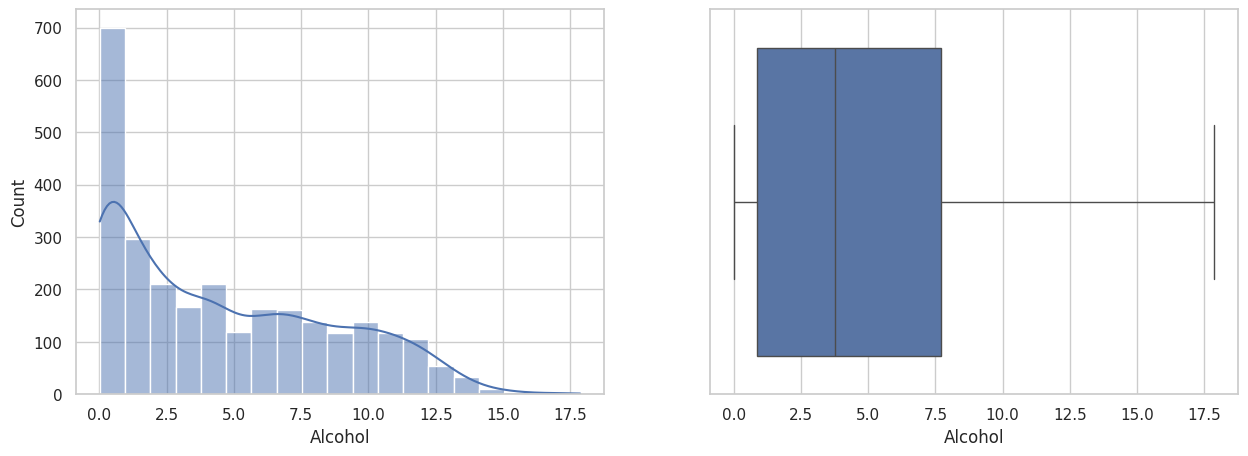

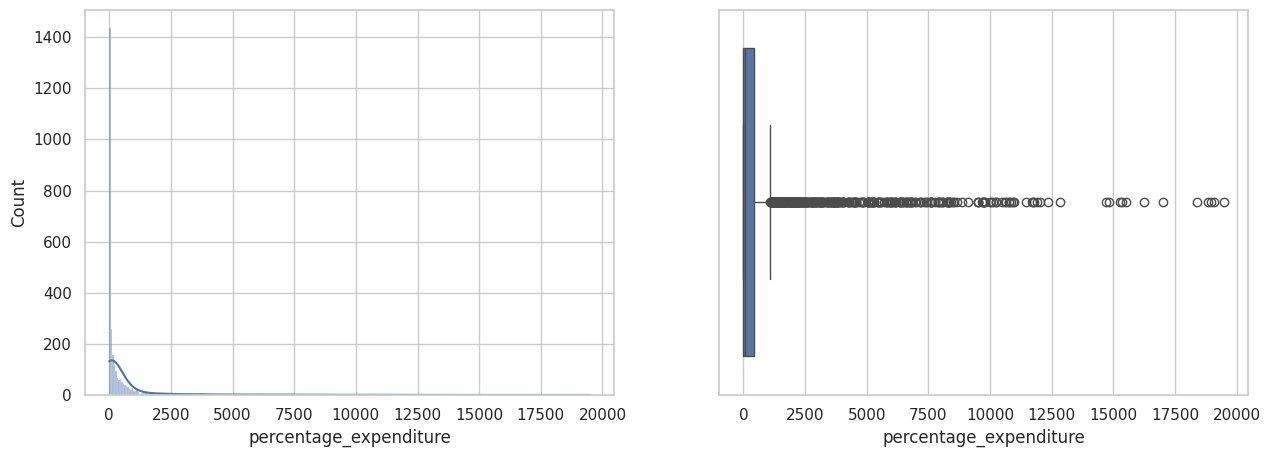

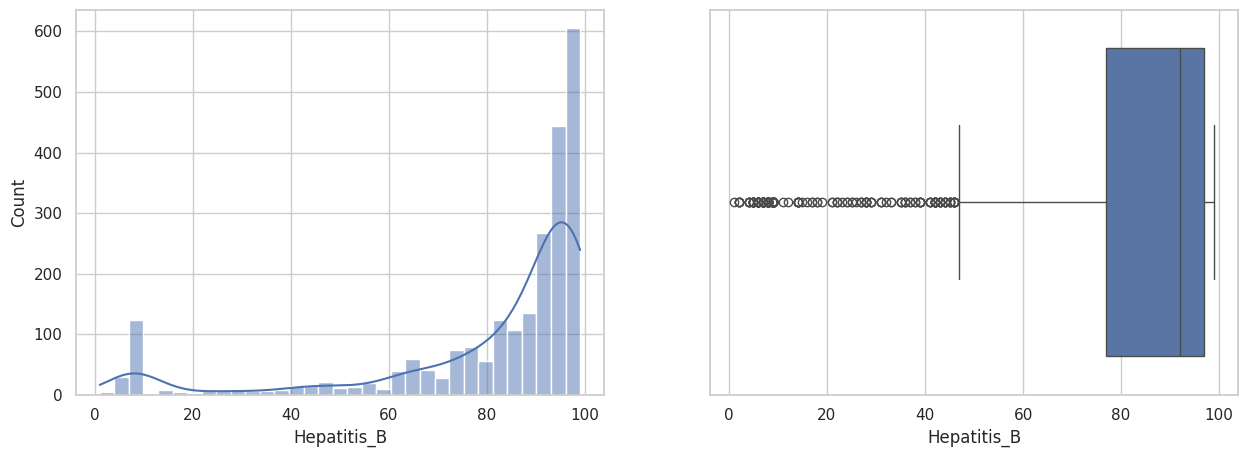

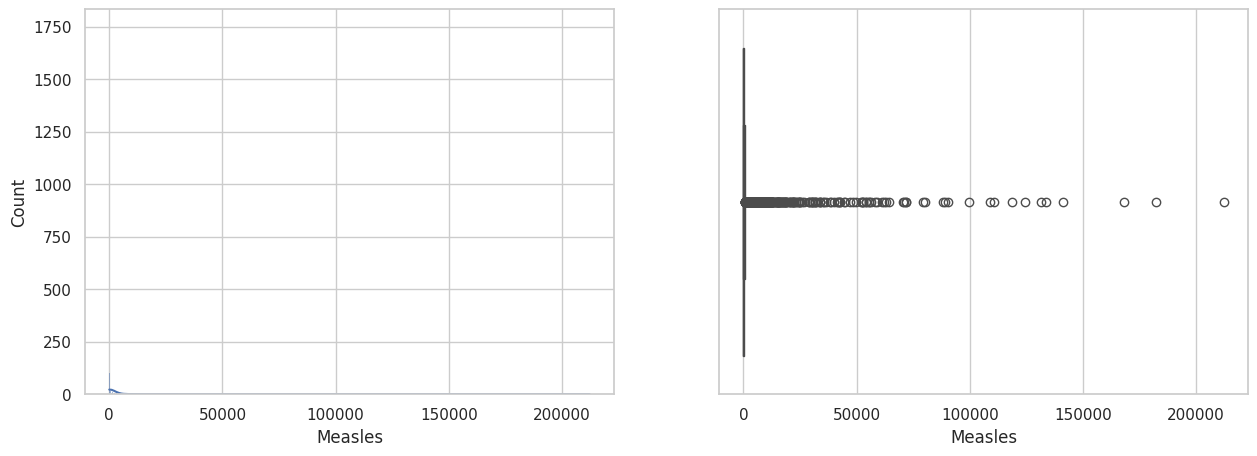

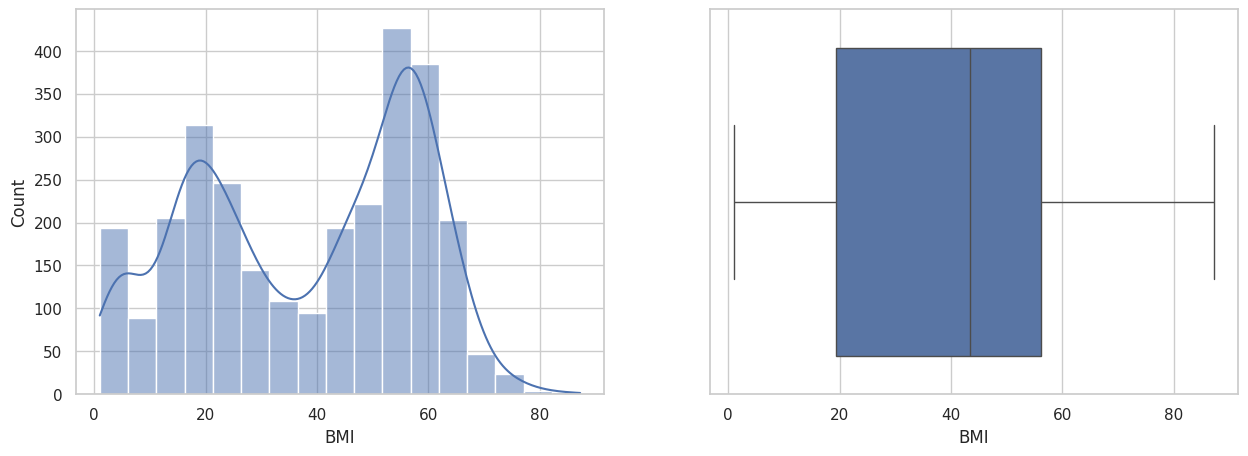

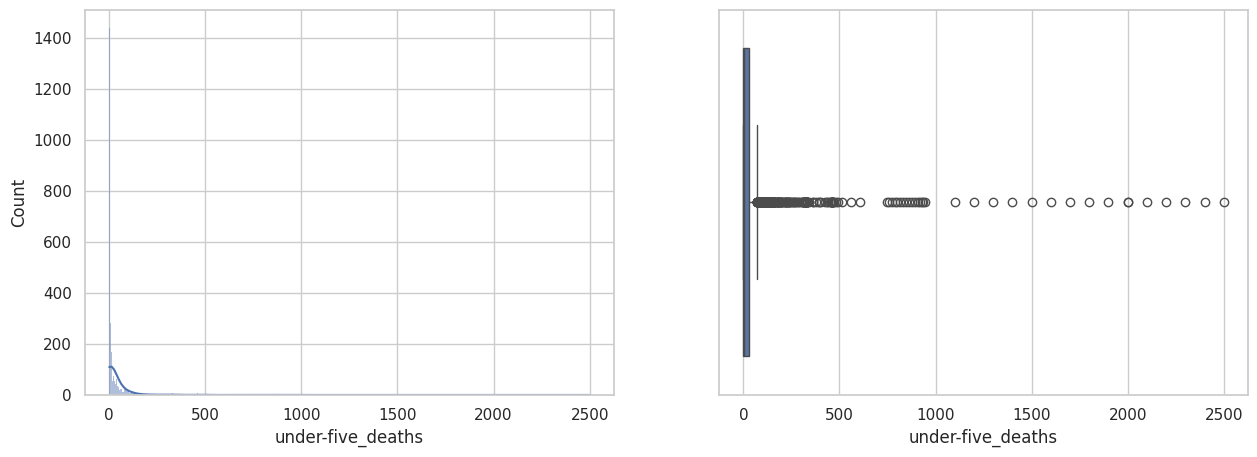

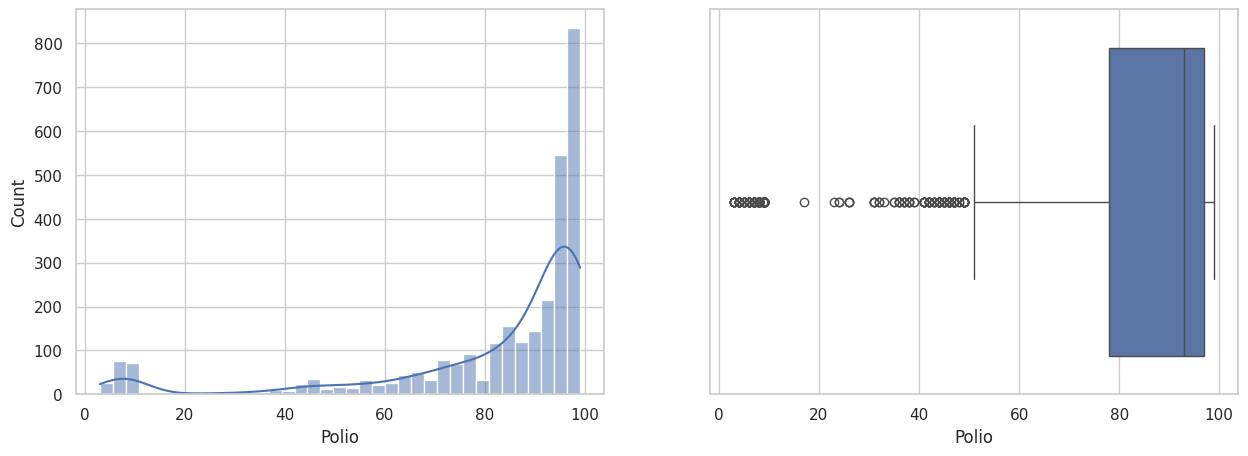

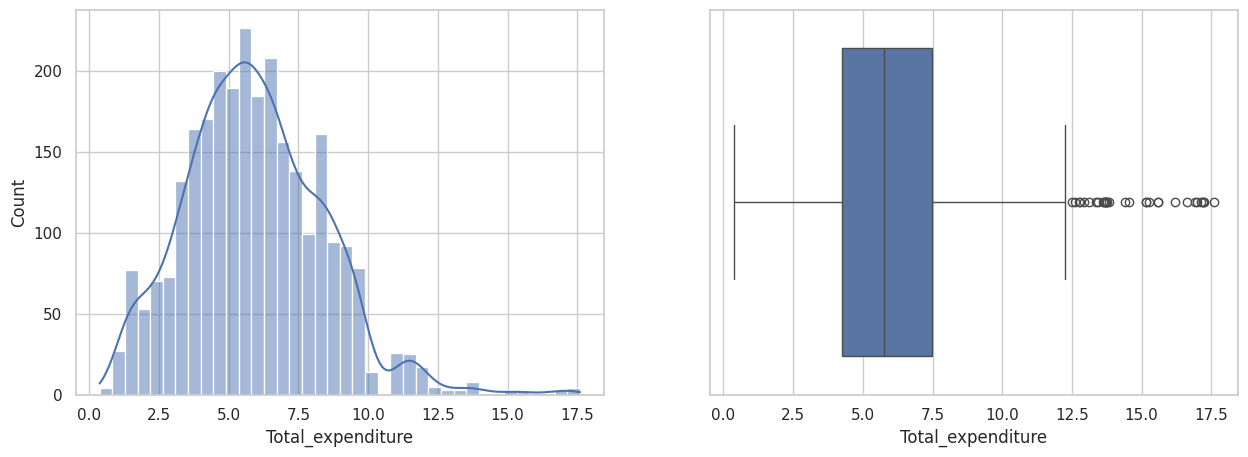

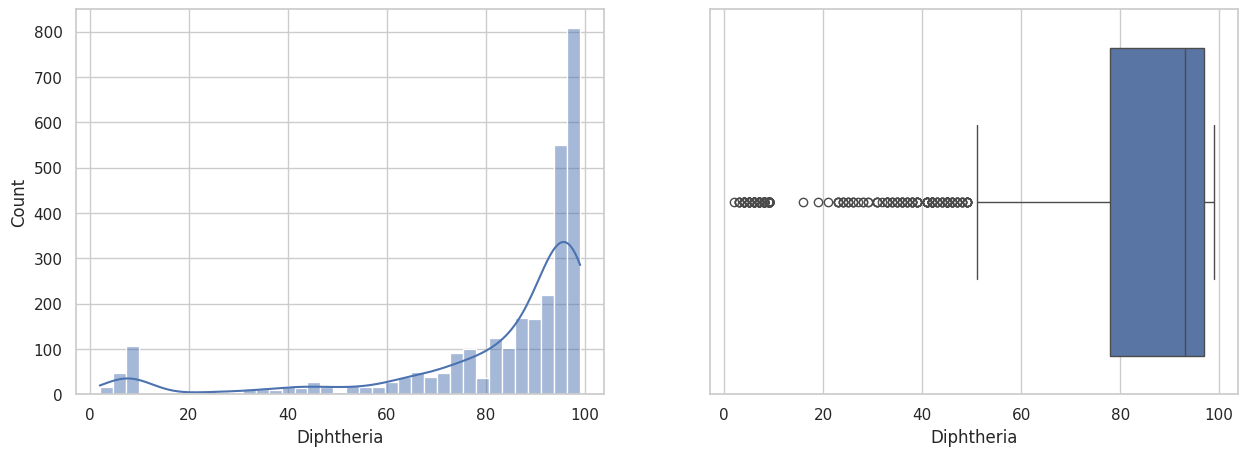

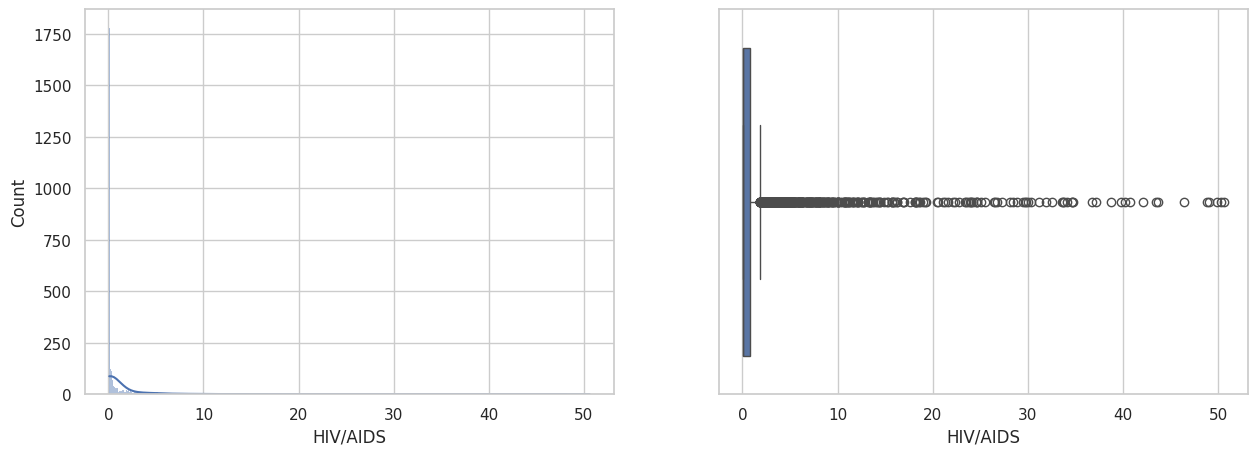

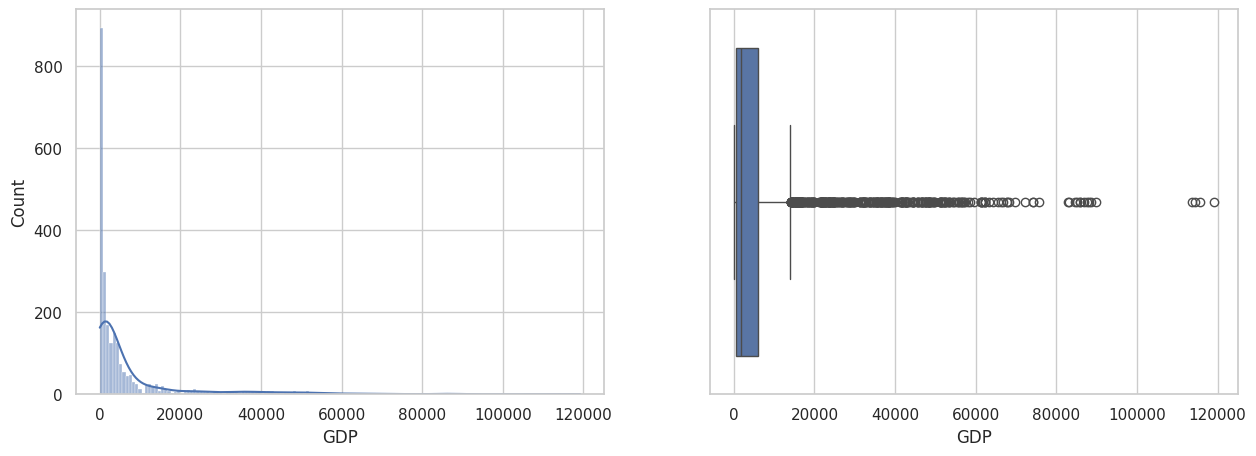

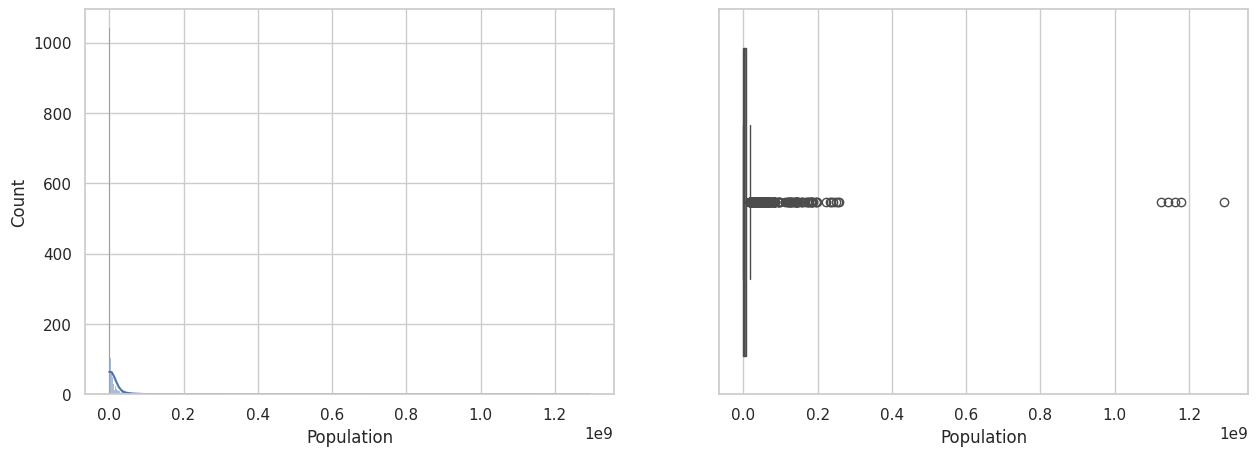

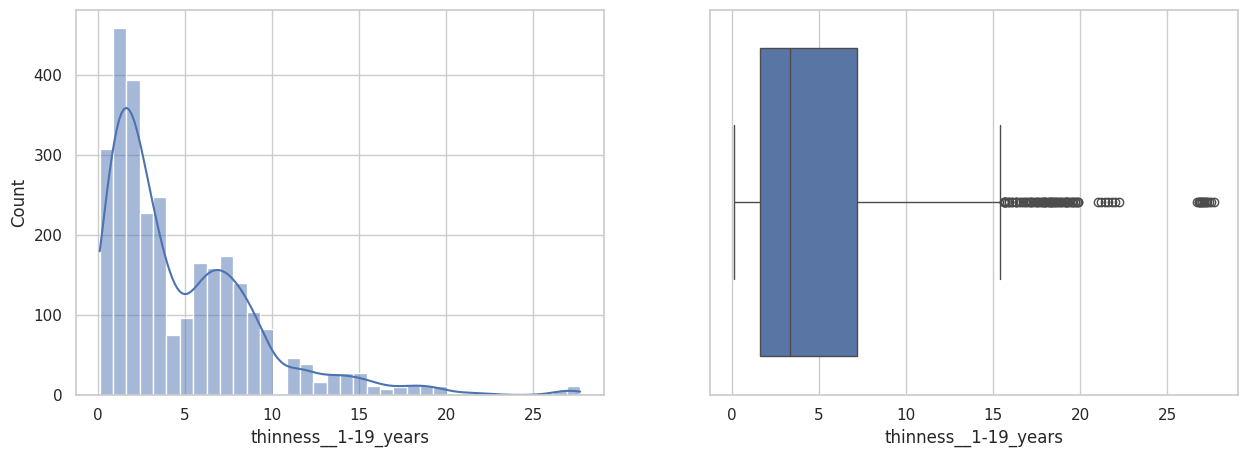

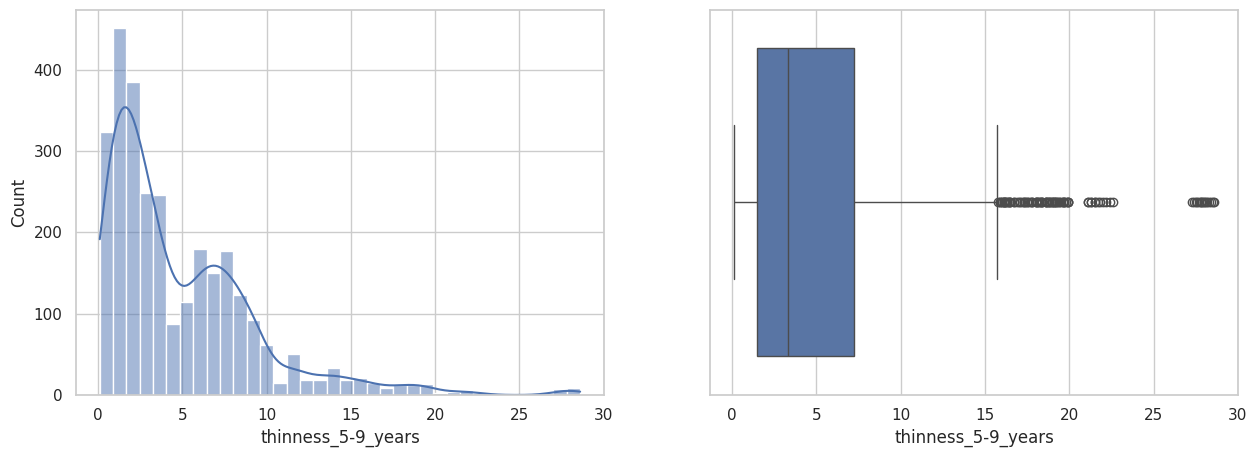

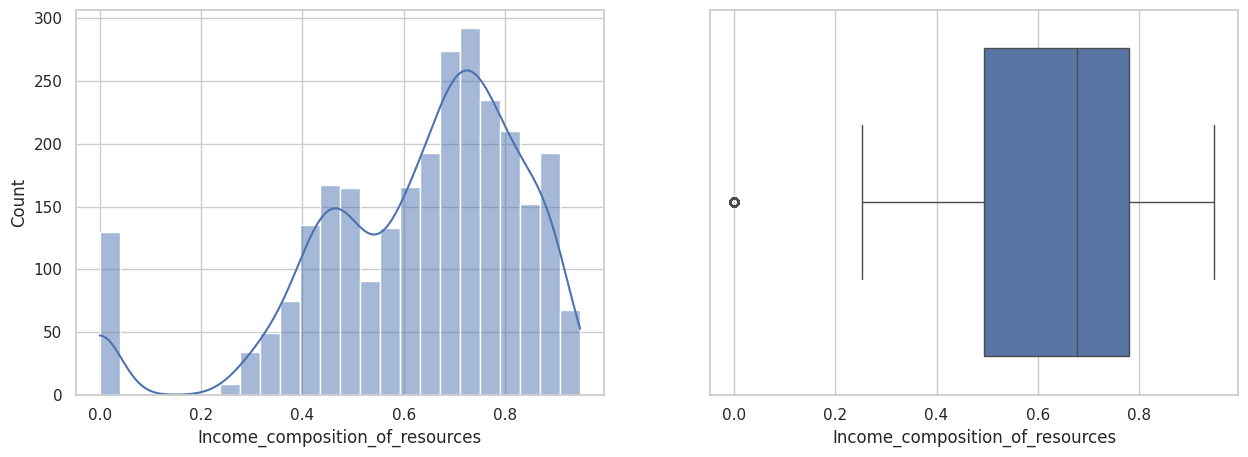

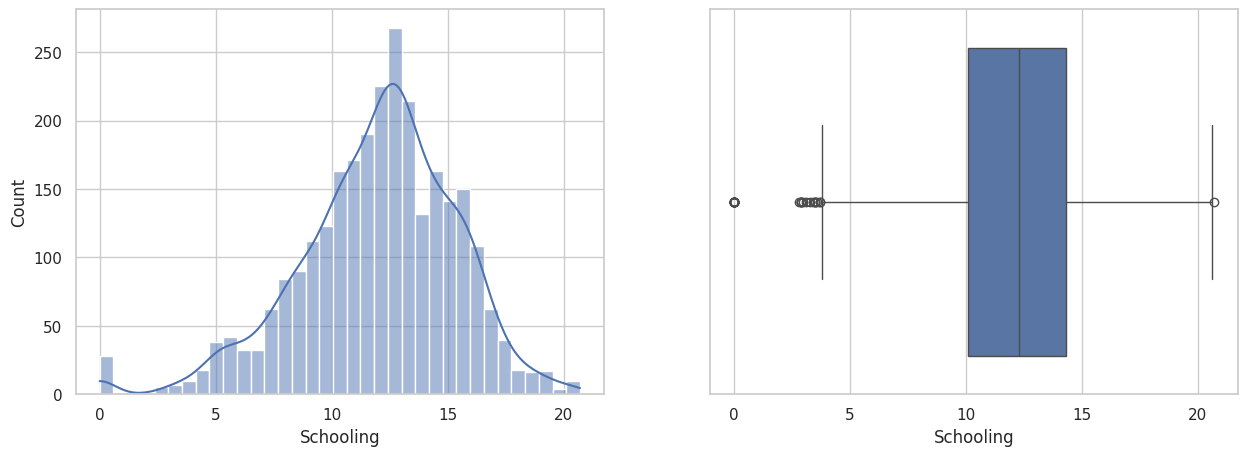

In [18]:
for i in num_cols:
  hist_box_plot(data, i)

In [19]:
data.columns[data.isnull().sum()>0]

Index(['Life_expectancy', 'Adult_Mortality', 'Alcohol', 'Hepatitis_B', 'BMI',
       'Polio', 'Total_expenditure', 'Diphtheria', 'GDP', 'Population',
       'thinness__1-19_years', 'thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [20]:
data.isna().sum()[data.isna().sum()>0]

Life_expectancy                     10
Adult_Mortality                     10
Alcohol                            194
Hepatitis_B                        553
BMI                                 34
Polio                               19
Total_expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [21]:
data[data['Life_expectancy'].isna()]

Country  Year      Status  Life_expectancy  \
624            Cook Islands  2013  Developing              NaN   
769                Dominica  2013  Developing              NaN   
1650       Marshall Islands  2013  Developing              NaN   
1715                 Monaco  2013  Developing              NaN   
1812                  Nauru  2013  Developing              NaN   
1909                   Niue  2013  Developing              NaN   
1958                  Palau  2013  Developing              NaN   
2167  Saint Kitts and Nevis  2013  Developing              NaN   
2216             San Marino  2013  Developing              NaN   
2713                 Tuvalu  2013  Developing              NaN   

      Adult_Mortality  infant_deaths  Alcohol  percentage_expenditure  \
624               NaN              0     0.01                0.000000   
769               NaN              0     0.01               11.419555   
1650              NaN              0     0.01              871.878317   
1715              NaN              0     0.01                0.000000   
1812              NaN              0     0.01               15.606596   
1909              NaN              0     0.01                0.000000   
1958              NaN              0      NaN              344.690631   
2167              NaN              0     8.54                0.000000   
2216              NaN              0     0.01                0.000000   
2713              NaN              0     0.01               78.281203   

      Hepatitis_B  Measles   BMI  under-five_deaths  Polio  Total_expenditure  \
624          98.0        0  82.8                  0   98.0               3.58   
769          96.0        0  58.4                  0   96.0               5.58   
1650          8.0        0  81.6                  0   79.0              17.24   
1715         99.0        0   NaN                  0   99.0               4.30   
1812         87.0        0  87.3                  0   87.0               4.65   
1909         99.0        0  77.3                  0   99.0               7.20   
1958         99.0        0  83.3                  0   99.0               9.27   
2167         97.0        0   5.2                  0   96.0               6.14   
2216         69.0        0   NaN                  0   69.0               6.50   
2713          9.0        0  79.3                  0    9.0              16.61   

      Diphtheria  HIV/AIDS          GDP  Population  thinness__1-19_years  \
624         98.0       0.1          NaN         NaN                   0.1   
769         96.0       0.1   722.756650         NaN                   2.7   
1650        79.0       0.1  3617.752354         NaN                   0.1   
1715        99.0       0.1          NaN         NaN                   NaN   
1812        87.0       0.1   136.183210         NaN                   0.1   
1909        99.0       0.1          NaN         NaN                   0.1   
1958        99.0       0.1  1932.122370       292.0                   0.1   
2167        96.0       0.1          NaN         NaN                   3.7   
2216        69.0       0.1          NaN         NaN                   NaN   
2713         9.0       0.1  3542.135890      1819.0                   0.2   

      thinness_5-9_years  Income_composition_of_resources  Schooling  
624                  0.1                              NaN        NaN  
769                  2.6                            0.721       12.7  
1650                 0.1                              NaN        0.0  
1715                 NaN                              NaN        NaN  
1812                 0.1                              NaN        9.6  
1909                 0.1                              NaN        NaN  
1958                 0.1                            0.779       14.2  
2167                 3.6                            0.749       13.4  
2216                 NaN                              NaN       15.1  
2713                 0.1               

In [22]:
len(data.dropna(subset=['Life_expectancy']))

2928

In [23]:
len(data)

2938

In [24]:
data = data.dropna(subset=['Life_expectancy'])
len(data)

2928

In [25]:
data.reset_index(drop=True, inplace=True)

In [26]:
data.head()

Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles   BMI  \
0             62     0.01               71.279624         65.0     1154  19.1   
1             64     0.01               73.523582         62.0      492  18.6   
2             66     0.01               73.219243         64.0      430  18.1   
3             69     0.01               78.184215         67.0     2787  17.6   
4             71     0.01                7.097109         68.0     3013  17.2   

   under-five_deaths  Polio  Total_expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Population  thinness__1-19_years  thinness_5-9_years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   

   Income_composition_of_resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [27]:
data.groupby('Status')['Adult_Mortality'].mean(), data.groupby('Status')['Adult_Mortality'].median()

(Status
 Developed      79.685547
 Developing    182.833195
 Name: Adult_Mortality, dtype: float64,
 Status
 Developed      73.0
 Developing    163.0
 Name: Adult_Mortality, dtype: float64)

229.0


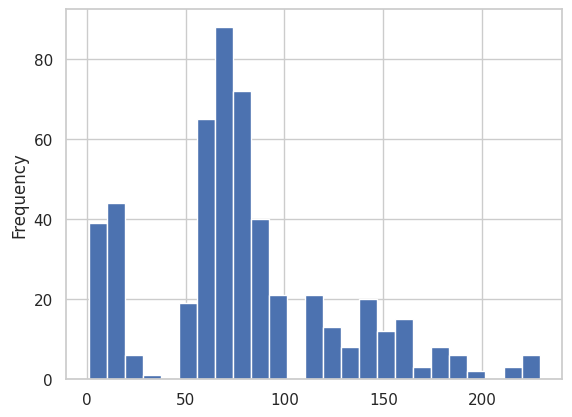

*************************
723.0


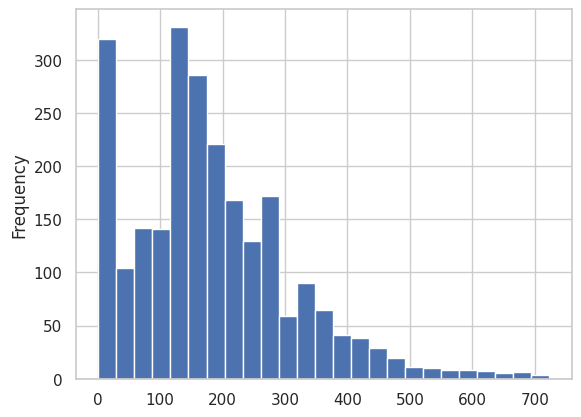

In [28]:
data.loc[data['Status'] == "Developed", 'Adult_Mortality'].plot(kind='hist', bins=25)
print(data.loc[data['Status'] == "Developed", 'Adult_Mortality'].max())
plt.show()
print('*'*25)
data.loc[data['Status'] == "Developing", 'Adult_Mortality'].plot(kind='hist', bins=25)
print(data.loc[data['Status'] == "Developing", 'Adult_Mortality'].max())
plt.show()

In [29]:
result = data.groupby('Status')['Adult_Mortality'].apply(lambda x: x.isna().sum())
print(result)


Status
Developed     0
Developing    0
Name: Adult_Mortality, dtype: int64


In [30]:
result = data.groupby('Status')['Alcohol'].apply(lambda x: x.isna().sum())
print(result)


Status
Developed      28
Developing    165
Name: Alcohol, dtype: int64


In [31]:
data.groupby('Status')['Alcohol'].mean(), data.groupby('Status')['Alcohol'].median()

(Status
 Developed     9.826736
 Developing    3.494220
 Name: Alcohol, dtype: float64,
 Status
 Developed     10.32
 Developing     2.58
 Name: Alcohol, dtype: float64)

In [32]:
data.groupby('Status')['Alcohol'].max()

Status
Developed     15.19
Developing    17.87
Name: Alcohol, dtype: float64

15.19


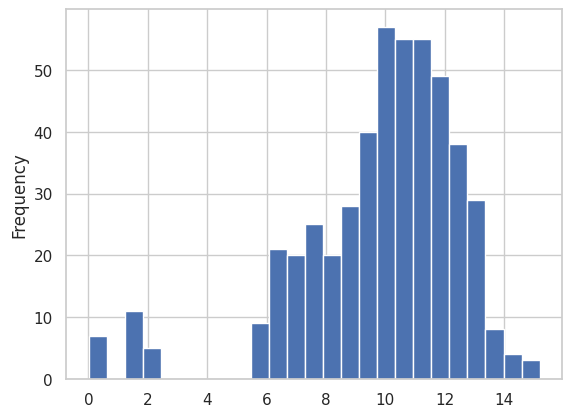

*************************
17.87


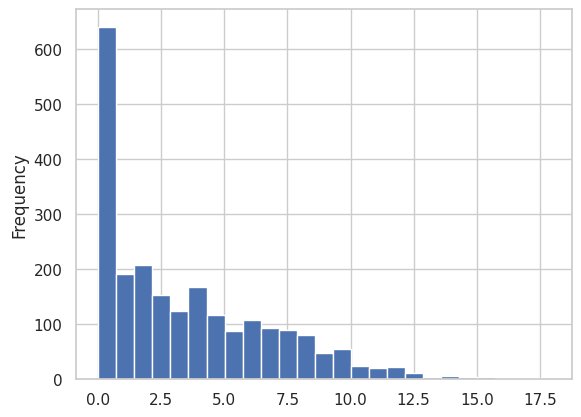

In [33]:
data.loc[data['Status'] == "Developed", 'Alcohol'].plot(kind='hist', bins=25)
print(data.loc[data['Status'] == "Developed", 'Alcohol'].max())
plt.show()
print('*'*25)
data.loc[data['Status'] == "Developing", 'Alcohol'].plot(kind='hist', bins=25)
print(data.loc[data['Status'] == "Developing", 'Alcohol'].max())

In [34]:
data.loc[data['Status'] == 'Developing', 'Alcohol'] = data.loc[data['Status'] == 'Developing', 'Alcohol'].fillna(3.0)

In [35]:
data.loc[data['Status'] == 'Developed', 'Alcohol'] = data.loc[data['Status'] == 'Developed', 'Alcohol'].fillna(10.0)

In [36]:
data.groupby('Status')['Hepatitis_B'].apply(lambda x:x.isna().sum())

Status
Developed     173
Developing    380
Name: Hepatitis_B, dtype: int64

In [37]:
def nan_count_by_status(data, col):
  result = data.groupby('Status')[col].apply(lambda x:x.isna().sum())
  print(result)


In [38]:
def histplot_by_status(data, col):
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  data.loc[data['Status'] == 'Developed', col].plot(kind='hist', bins=25)
  print("Max value of Developed status:", data.loc[data['Status'] == 'Developed', col].max())
  plt.title('Developed')
  plt.subplot(1,2,2)
  data.loc[data['Status'] == 'Developing', col].plot(kind='hist', bins=25)
  print("Max value of Developing status:", data.loc[data['Status'] == 'Developing', col].max())
  plt.title('Developing')
  plt.show()
  mean_summary = data.groupby('Status')[col].mean()
  median_summary = data.groupby('Status')[col].median()
  return mean_summary, median_summary

In [39]:
def fillna_by_status(data, col, status_value, fill_value):
  data.loc[data['Status'] == status_value, col] = data.loc[data['Status'] == status_value, col].fillna(fill_value)
  return data.isna().sum()[data.isna().sum()>0]

In [40]:
nan_count_by_status(data, 'Hepatitis_B')

Status
Developed     173
Developing    380
Name: Hepatitis_B, dtype: int64


Max value of Developed status: 99.0
Max value of Developing status: 99.0


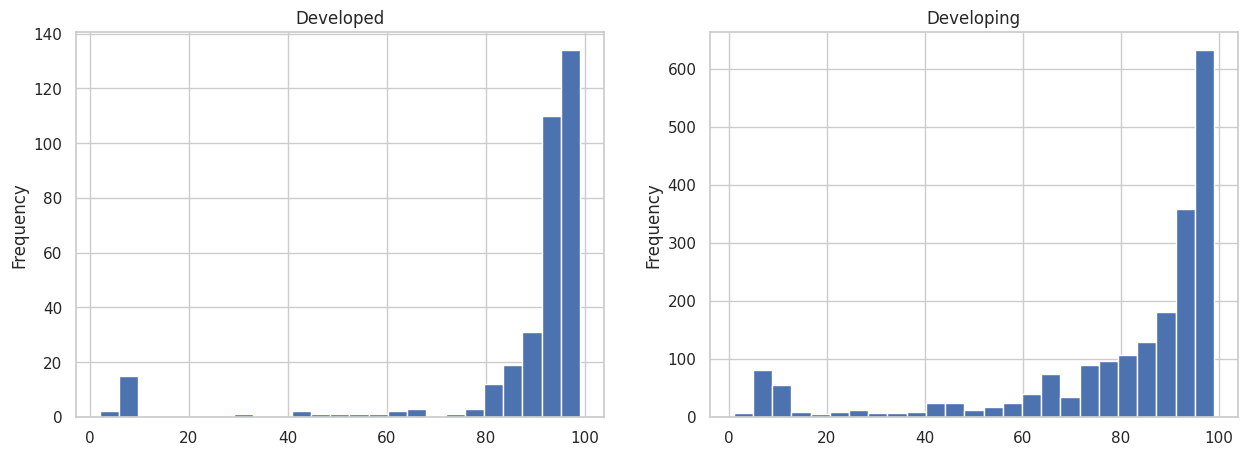

(Status
 Developed     88.041298
 Developing    79.781925
 Name: Hepatitis_B, dtype: float64,
 Status
 Developed     95.0
 Developing    91.0
 Name: Hepatitis_B, dtype: float64)

In [41]:
histplot_by_status(data, 'Hepatitis_B')

In [42]:
fillna_by_status(data, 'Hepatitis_B', 'Developed', 88.04)

Hepatitis_B                        380
BMI                                 32
Polio                               19
Total_expenditure                  226
Diphtheria                          19
GDP                                443
Population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
Income_composition_of_resources    160
Schooling                          160
dtype: int64

In [43]:
fillna_by_status(data, 'Hepatitis_B', 'Developing', 79.78)

BMI                                 32
Polio                               19
Total_expenditure                  226
Diphtheria                          19
GDP                                443
Population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
Income_composition_of_resources    160
Schooling                          160
dtype: int64

In [44]:
nan_count_by_status(data, 'BMI')

Status
Developed      0
Developing    32
Name: BMI, dtype: int64


Max value of Developed status: 69.6
Max value of Developing status: 77.6


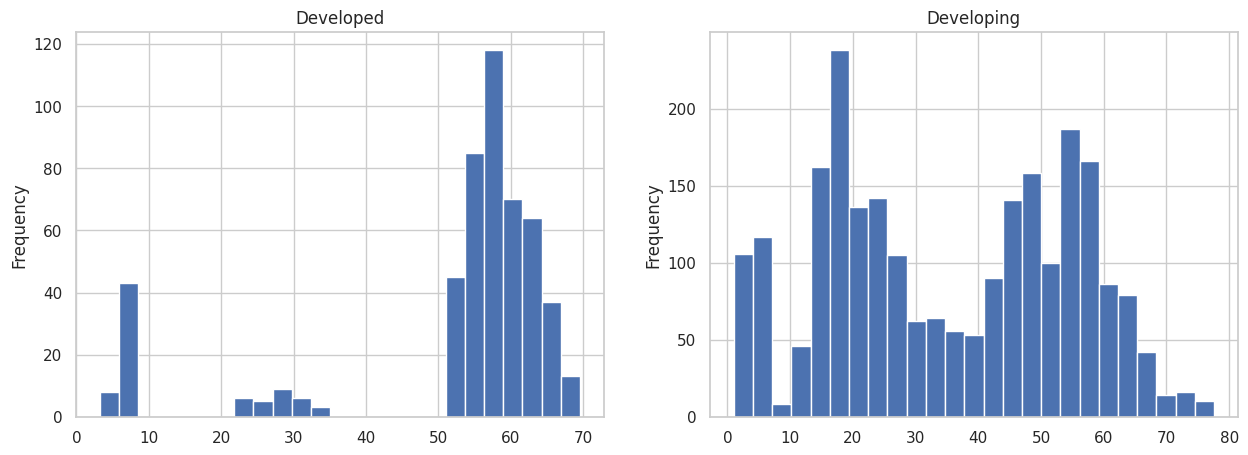

(Status
 Developed     51.803906
 Developing    35.321351
 Name: BMI, dtype: float64,
 Status
 Developed     57.45
 Developing    35.15
 Name: BMI, dtype: float64)

In [45]:
histplot_by_status(data, 'BMI')

In [46]:
fillna_by_status(data, 'BMI', 'Developed', 57.45)

BMI                                 32
Polio                               19
Total_expenditure                  226
Diphtheria                          19
GDP                                443
Population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
Income_composition_of_resources    160
Schooling                          160
dtype: int64

In [47]:
fillna_by_status(data, 'BMI', 'Developing', 35.32)

Polio                               19
Total_expenditure                  226
Diphtheria                          19
GDP                                443
Population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
Income_composition_of_resources    160
Schooling                          160
dtype: int64

In [48]:
nan_count_by_status(data, 'Polio')

Status
Developed      0
Developing    19
Name: Polio, dtype: int64


Max value of Developed status: 99.0
Max value of Developing status: 99.0


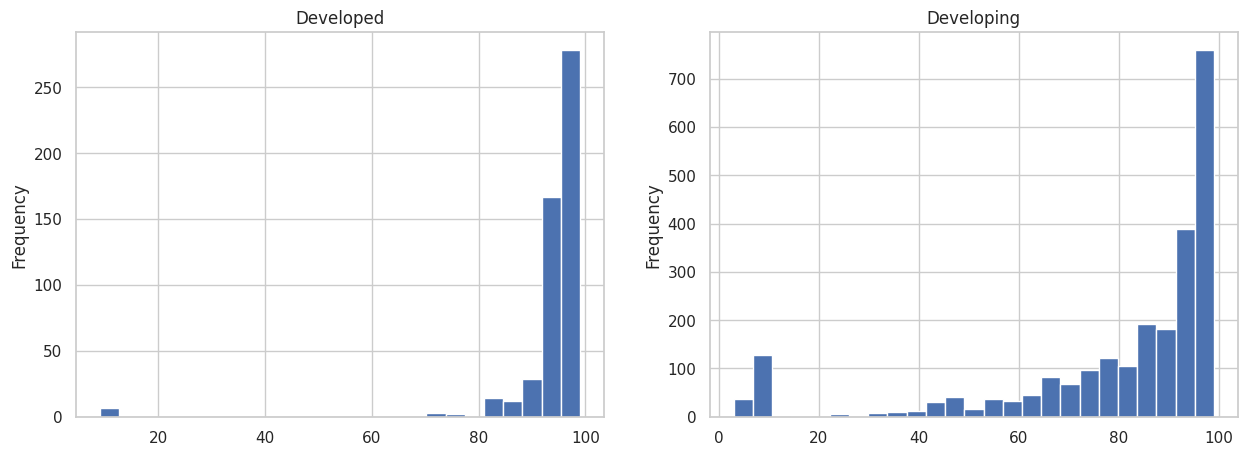

(Status
 Developed     93.736328
 Developing    80.158531
 Name: Polio, dtype: float64,
 Status
 Developed     96.0
 Developing    91.0
 Name: Polio, dtype: float64)

In [49]:
histplot_by_status(data, 'Polio')

In [50]:
fillna_by_status(data, 'Polio', 'Developed', 96.0)

Polio                               19
Total_expenditure                  226
Diphtheria                          19
GDP                                443
Population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
Income_composition_of_resources    160
Schooling                          160
dtype: int64

In [51]:
fillna_by_status(data, 'Polio', 'Developing', 91.0)

Total_expenditure                  226
Diphtheria                          19
GDP                                443
Population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
Income_composition_of_resources    160
Schooling                          160
dtype: int64

Status
Developed      32
Developing    194
Name: Total_expenditure, dtype: int64
Max value of Developed status: 17.6
Max value of Developing status: 14.39


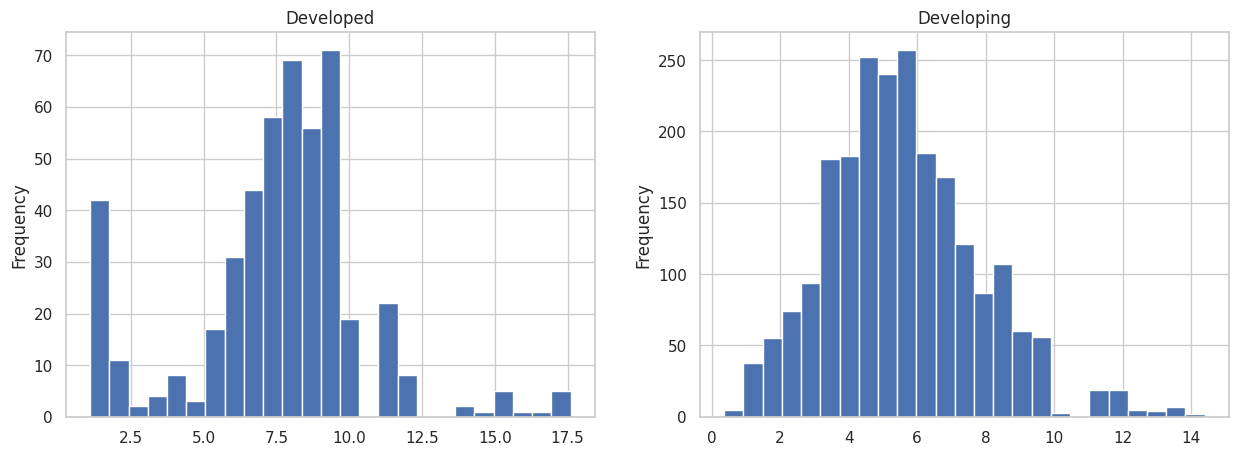

(Status
 Developed     7.554042
 Developing    5.579370
 Name: Total_expenditure, dtype: float64,
 Status
 Developed     7.895
 Developing    5.400
 Name: Total_expenditure, dtype: float64)

In [52]:
nan_count_by_status(data, 'Total_expenditure')
histplot_by_status(data, 'Total_expenditure')

In [53]:
fillna_by_status(data, 'Total_expenditure', 'Developed', 7.895)

Total_expenditure                  194
Diphtheria                          19
GDP                                443
Population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
Income_composition_of_resources    160
Schooling                          160
dtype: int64

In [54]:
fillna_by_status(data, 'Total_expenditure', 'Developing', 5.400)

Diphtheria                          19
GDP                                443
Population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
Income_composition_of_resources    160
Schooling                          160
dtype: int64

Status
Developed      0
Developing    19
Name: Diphtheria, dtype: int64
Max value of Developed status: 99.0
Max value of Developing status: 99.0


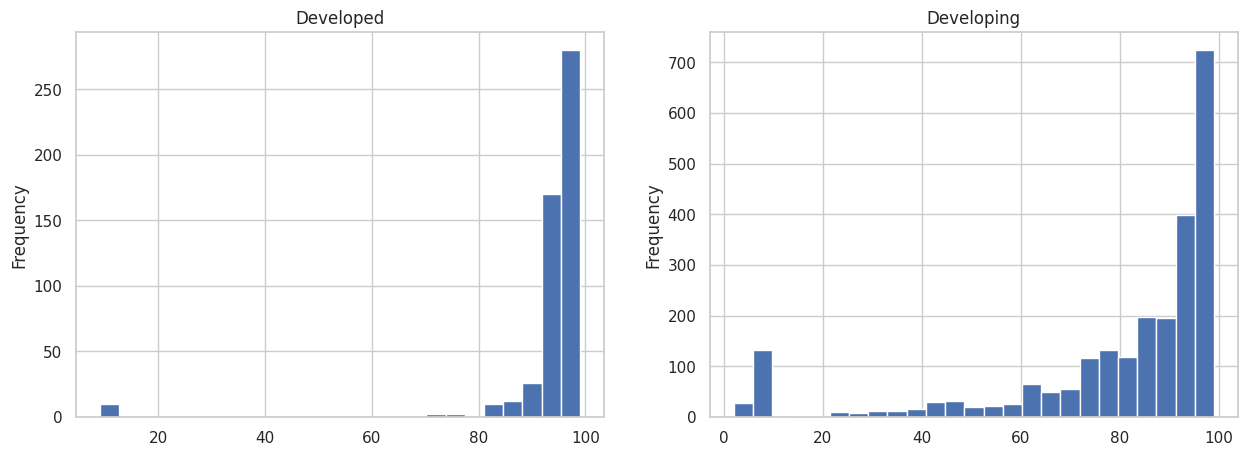

(Status
 Developed     93.476562
 Developing    79.938673
 Name: Diphtheria, dtype: float64,
 Status
 Developed     96.0
 Developing    91.0
 Name: Diphtheria, dtype: float64)

In [55]:
nan_count_by_status(data, 'Diphtheria')
histplot_by_status(data, 'Diphtheria')

In [56]:
fillna_by_status(data, 'Diphtheria', 'Developing', 91.0)

GDP                                443
Population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
Income_composition_of_resources    160
Schooling                          160
dtype: int64

Status
Developed      64
Developing    379
Name: GDP, dtype: int64
Max value of Developed status: 119172.7418
Max value of Developing status: 88564.82298


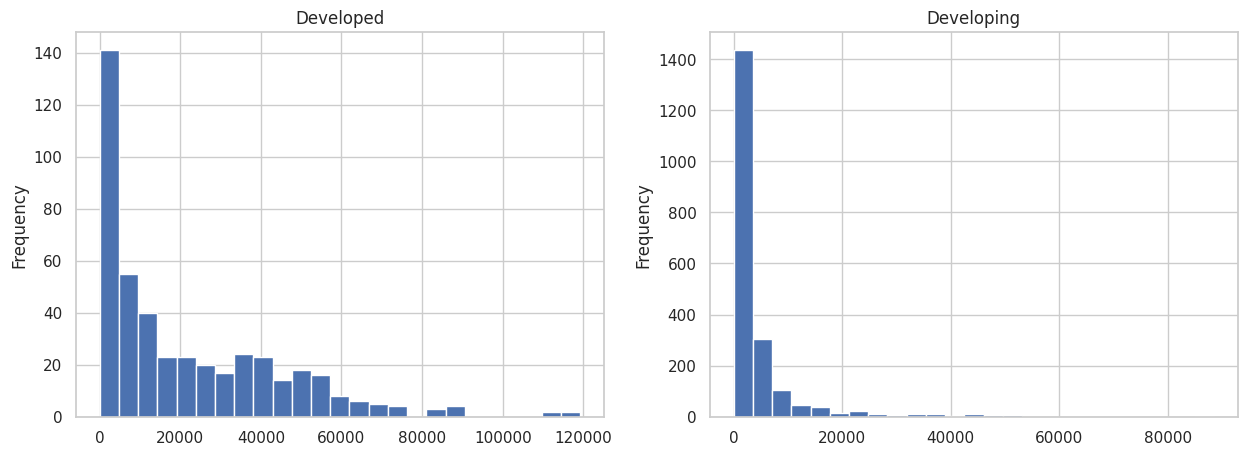

(Status
 Developed     22053.386446
 Developing     4292.192690
 Name: GDP, dtype: float64,
 Status
 Developed     13560.723860
 Developing     1244.429421
 Name: GDP, dtype: float64)

In [57]:
nan_count_by_status(data, 'GDP')
histplot_by_status(data, 'GDP')

In [58]:
fillna_by_status(data, 'GDP', 'Developed', 13560.72)
fillna_by_status(data, 'GDP', 'Developing', 1244.42)

Population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
Income_composition_of_resources    160
Schooling                          160
dtype: int64

Status
Developed      96
Developing    548
Name: Population, dtype: int64
Max value of Developed status: 82534176.0
Max value of Developing status: 1293859294.0


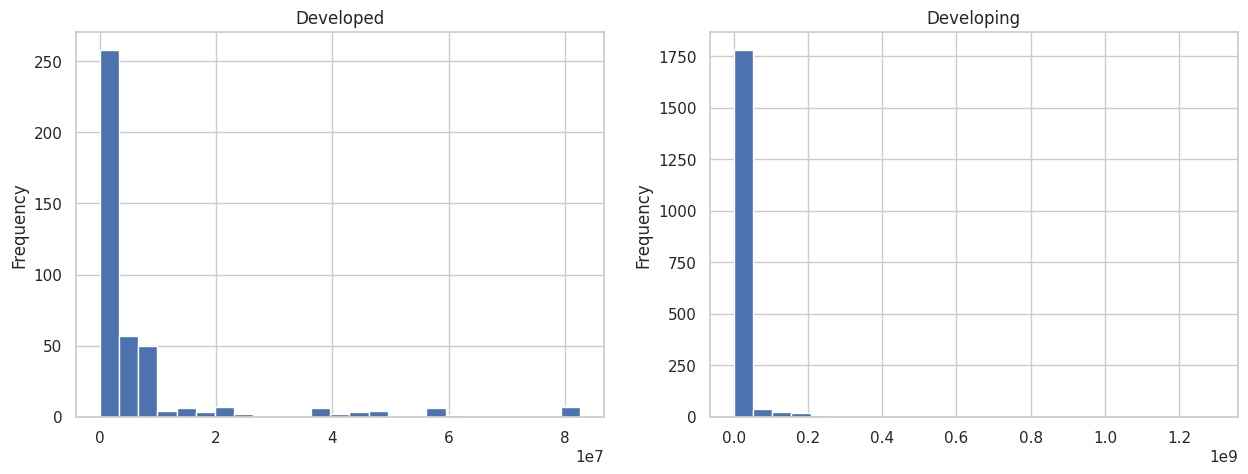

(Status
 Developed     6.830053e+06
 Developing    1.408614e+07
 Name: Population, dtype: float64,
 Status
 Developed     1167660.0
 Developing    1412966.5
 Name: Population, dtype: float64)

In [59]:
nan_count_by_status(data, 'Population')
histplot_by_status(data, 'Population')

In [60]:
fillna_by_status(data, 'Population', 'Developed', 1167660)
fillna_by_status(data, 'Population', 'Developing', 1412966)

thinness__1-19_years                32
thinness_5-9_years                  32
Income_composition_of_resources    160
Schooling                          160
dtype: int64

Status
Developed      0
Developing    32
Name: thinness__1-19_years, dtype: int64
Max value of Developed status: 4.0
Max value of Developing status: 27.7


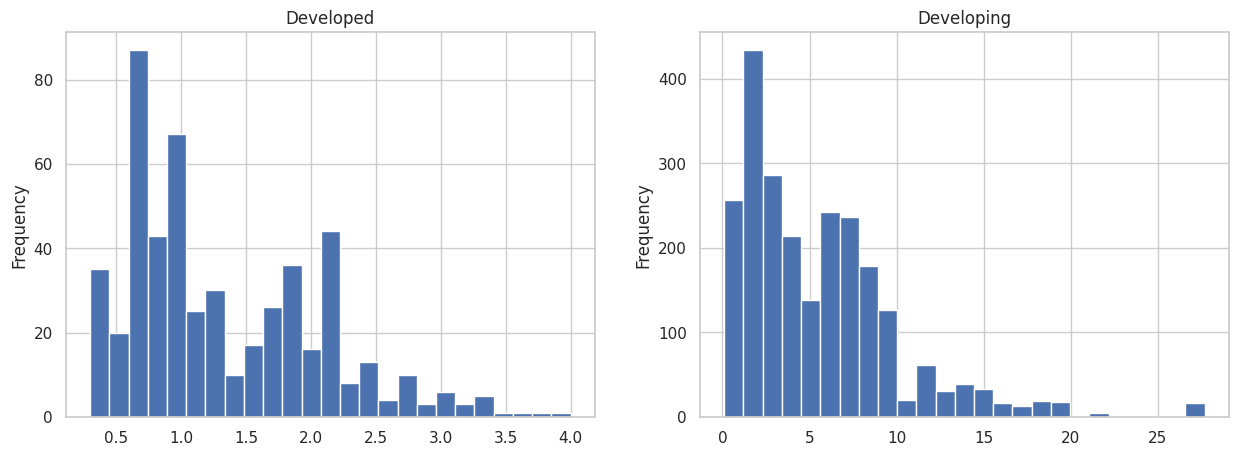

(Status
 Developed     1.320703
 Developing    5.608725
 Name: thinness__1-19_years, dtype: float64,
 Status
 Developed     1.10
 Developing    4.65
 Name: thinness__1-19_years, dtype: float64)

In [61]:
nan_count_by_status(data, 'thinness__1-19_years')
histplot_by_status(data, 'thinness__1-19_years')

In [62]:
fillna_by_status(data, 'thinness__1-19_years', 'Developing', 4.65)

thinness_5-9_years                  32
Income_composition_of_resources    160
Schooling                          160
dtype: int64

Status
Developed      0
Developing    32
Name: thinness_5-9_years, dtype: int64
Max value of Developed status: 4.3
Max value of Developing status: 28.6


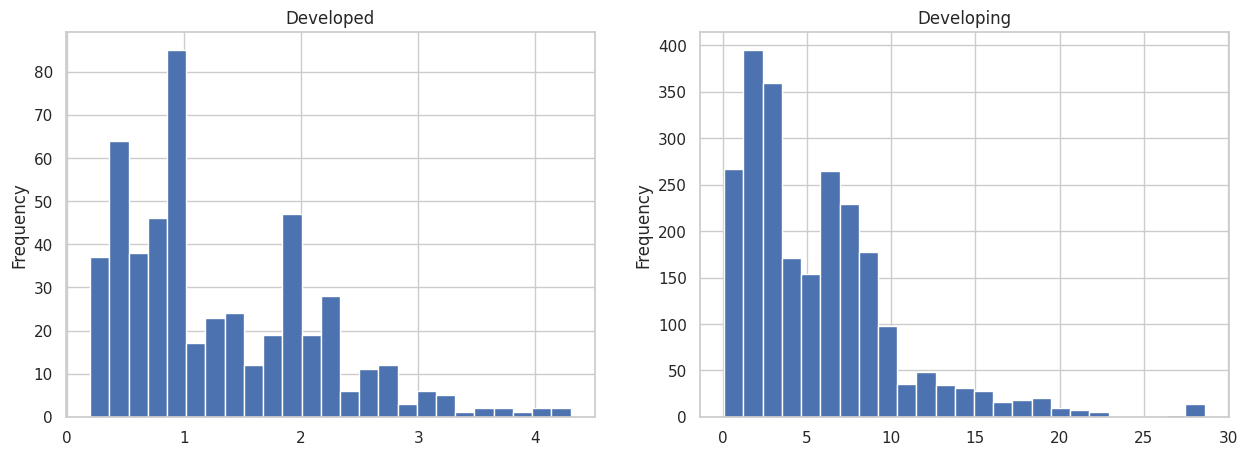

(Status
 Developed     1.29668
 Developing    5.65130
 Name: thinness_5-9_years, dtype: float64,
 Status
 Developed     1.0
 Developing    4.6
 Name: thinness_5-9_years, dtype: float64)

In [63]:
nan_count_by_status(data, 'thinness_5-9_years')
histplot_by_status(data, 'thinness_5-9_years')

In [64]:
fillna_by_status(data, 'thinness_5-9_years', 'Developing', 4.6)

Income_composition_of_resources    160
Schooling                          160
dtype: int64

Status
Developed      48
Developing    112
Name: Income_composition_of_resources, dtype: int64
Max value of Developed status: 0.948
Max value of Developing status: 0.919


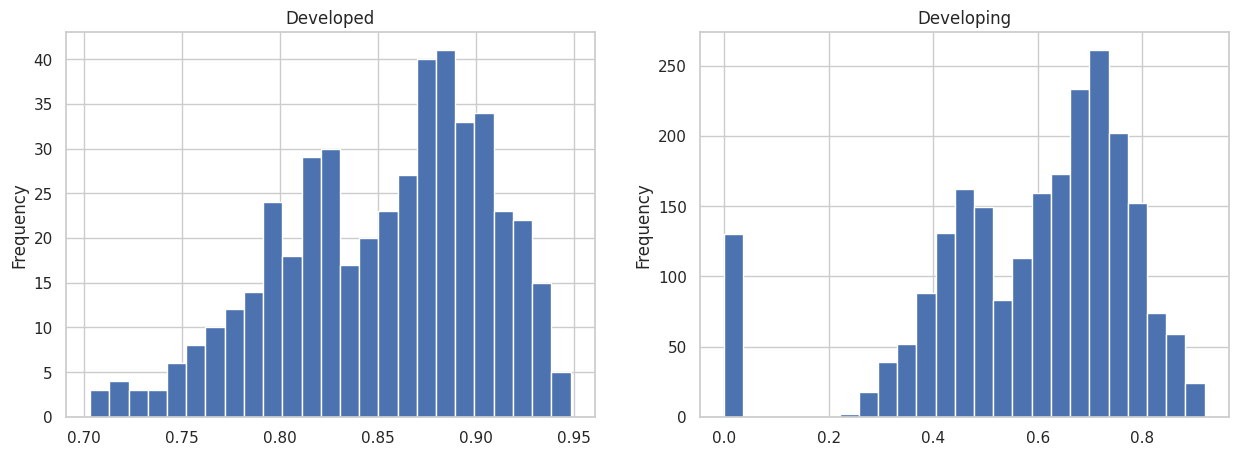

(Status
 Developed     0.852489
 Developing    0.582092
 Name: Income_composition_of_resources, dtype: float64,
 Status
 Developed     0.862
 Developing    0.631
 Name: Income_composition_of_resources, dtype: float64)

In [65]:
nan_count_by_status(data, 'Income_composition_of_resources')
histplot_by_status(data, 'Income_composition_of_resources')

In [66]:
fillna_by_status(data, 'Income_composition_of_resources', 'Developed', 0.862)
fillna_by_status(data, 'Income_composition_of_resources', 'Developing', 0.631)

Schooling    160
dtype: int64

Status
Developed      48
Developing    112
Name: Schooling, dtype: int64
Max value of Developed status: 20.7
Max value of Developing status: 18.3


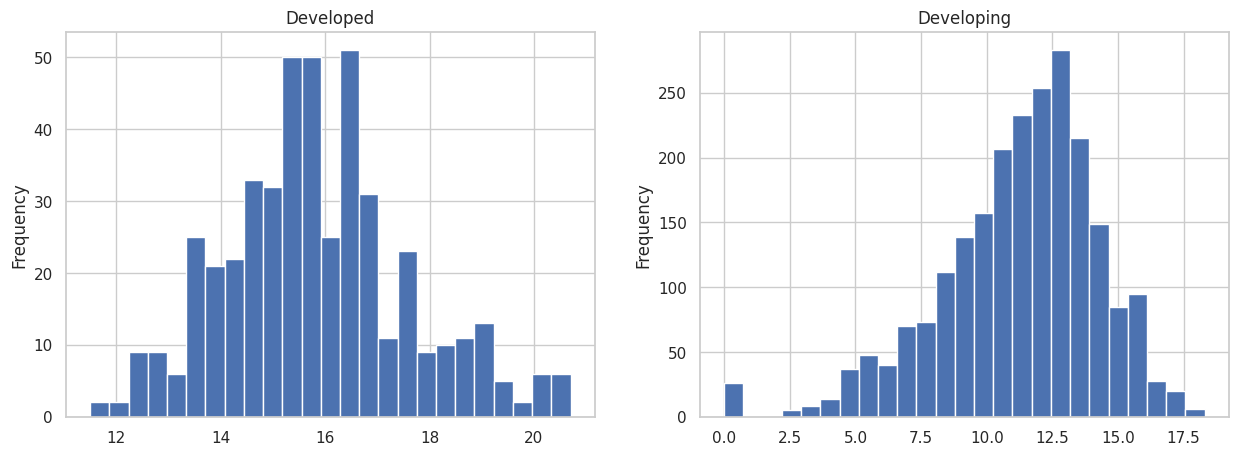

(Status
 Developed     15.845474
 Developing    11.225130
 Name: Schooling, dtype: float64,
 Status
 Developed     15.8
 Developing    11.7
 Name: Schooling, dtype: float64)

In [67]:
nan_count_by_status(data, 'Schooling')
histplot_by_status(data, 'Schooling')

In [68]:
fillna_by_status(data, 'Schooling', 'Developed', 15.8)
fillna_by_status(data, 'Schooling', 'Developing', 11.7)

Series([], dtype: int64)

In [69]:
data.isna().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

# Basic EDA

In [70]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult_Mortality                    float64
infant_deaths                        int64
Alcohol                            float64
percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
under-five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness__1-19_years               float64
thinness_5-9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object

In [71]:
cat_cols = data.columns[data.dtypes == 'object']
cat_cols

Index(['Country', 'Status'], dtype='object')

In [72]:
num_cols = data.columns[data.dtypes != 'object']
num_cols

Index(['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [73]:
len(data)

2928

In [74]:
df = data[num_cols]
len(df), df.head()

(2928,
    Year  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
 0  2015             65.0            263.0             62     0.01   
 1  2014             59.9            271.0             64     0.01   
 2  2013             59.9            268.0             66     0.01   
 3  2012             59.5            272.0             69     0.01   
 4  2011             59.2            275.0             71     0.01   
 
    percentage_expenditure  Hepatitis_B  Measles   BMI  under-five_deaths  \
 0               71.279624         65.0     1154  19.1                 83   
 1               73.523582         62.0      492  18.6                 86   
 2               73.219243         64.0      430  18.1                 89   
 3               78.184215         67.0     2787  17.6                 93   
 4                7.097109         68.0     3013  17.2                 97   
 
    Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
 0    6.0               8.16 

In [75]:
#sns.pairplot(df)

In [76]:
"""
The diagonal shows the distribution of each variable, while off-diagonal cells show scatterplots between pairs of variables.
Several variables appear to have a positive correlation with life expectancy:

GDP or economic indicators (showing upward trends)
Healthcare spending or access metrics
Education-related variables


Some variables show negative correlation with life expectancy:

What appear to be disease prevalence metrics
Possibly mortality rates or health risk factors


There are several distinct patterns visible:

Linear relationships (straight line patterns)
Logarithmic relationships (curved patterns that flatten at higher values)
Clustered data points suggesting potential groupings of countries or regions


Some scatterplots show clear outliers that deviate from the general trends.
Several variables appear to have non-uniform distributions (visible in the diagonal plots), with some showing bimodal or skewed patterns.
The data density varies across different regions of the plots, suggesting uneven distribution of observations.
Some relationships appear to plateau, indicating diminishing returns (e.g., after a certain level of GDP or healthcare spending, the gains in life expectancy become smaller)."""

'\nThe diagonal shows the distribution of each variable, while off-diagonal cells show scatterplots between pairs of variables.\nSeveral variables appear to have a positive correlation with life expectancy:\n\nGDP or economic indicators (showing upward trends)\nHealthcare spending or access metrics\nEducation-related variables\n\n\nSome variables show negative correlation with life expectancy:\n\nWhat appear to be disease prevalence metrics\nPossibly mortality rates or health risk factors\n\n\nThere are several distinct patterns visible:\n\nLinear relationships (straight line patterns)\nLogarithmic relationships (curved patterns that flatten at higher values)\nClustered data points suggesting potential groupings of countries or regions\n\n\nSome scatterplots show clear outliers that deviate from the general trends.\nSeveral variables appear to have non-uniform distributions (visible in the diagonal plots), with some showing bimodal or skewed patterns.\nThe data density varies across di

In [77]:
#sns.pairplot(data, hue='Status',markers=["o", "s"], corner=True)

In [78]:
#sns.pairplot(data, hue='Year')

In [79]:
#sns.pairplot(data, kind="kde")

In [80]:
"""Here are my observations:

The diagonal elements display the distribution (histograms) of each variable, with several showing different patterns:

Some variables have normal/bell-curve distributions
Others show right-skewed distributions
A few appear bimodal (having two peaks)


The off-diagonal elements show relationship patterns between pairs of variables using contour lines (density plots) rather than individual points:

Contour lines reveal where data points are most concentrated
Darker blue areas indicate higher density of observations


Several strong relationships are visible:

Some variable pairs show clear linear relationships (straight diagonal patterns)
Others display non-linear relationships (curved contour patterns)
Some show clustering patterns indicating potential groups in the data


There are variables that appear to have little to no relationship with others (shown by circular or irregular contour patterns)
Some relationships show distinctive patterns:

"Boomerang" or curved relationships
Clustered relationships with discrete groupings
Relationships with outlier regions


The density contours reveal multimodal distributions in several relationships (multiple areas of high density)
Some variables appear to have boundary effects or constraints (sharp cutoffs in the contour patterns)
The bottom row and rightmost column (likely corresponding to the target variable) show various relationship patterns with other variables
There are indications of potential correlation clusters, where groups of variables show similar relationship patterns
The use of contour density visualization helps identify complex relationship patterns that might not be as visible in traditional scatter plots"""

'Here are my observations:\n\nThe diagonal elements display the distribution (histograms) of each variable, with several showing different patterns:\n\nSome variables have normal/bell-curve distributions\nOthers show right-skewed distributions\nA few appear bimodal (having two peaks)\n\n\nThe off-diagonal elements show relationship patterns between pairs of variables using contour lines (density plots) rather than individual points:\n\nContour lines reveal where data points are most concentrated\nDarker blue areas indicate higher density of observations\n\n\nSeveral strong relationships are visible:\n\nSome variable pairs show clear linear relationships (straight diagonal patterns)\nOthers display non-linear relationships (curved contour patterns)\nSome show clustering patterns indicating potential groups in the data\n\n\nThere are variables that appear to have little to no relationship with others (shown by circular or irregular contour patterns)\nSome relationships show distinctive p

In [81]:
num_cols

Index(['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [82]:
num_cols1 = num_cols.drop('Life_expectancy')
num_cols1

Index(['Year', 'Adult_Mortality', 'infant_deaths', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

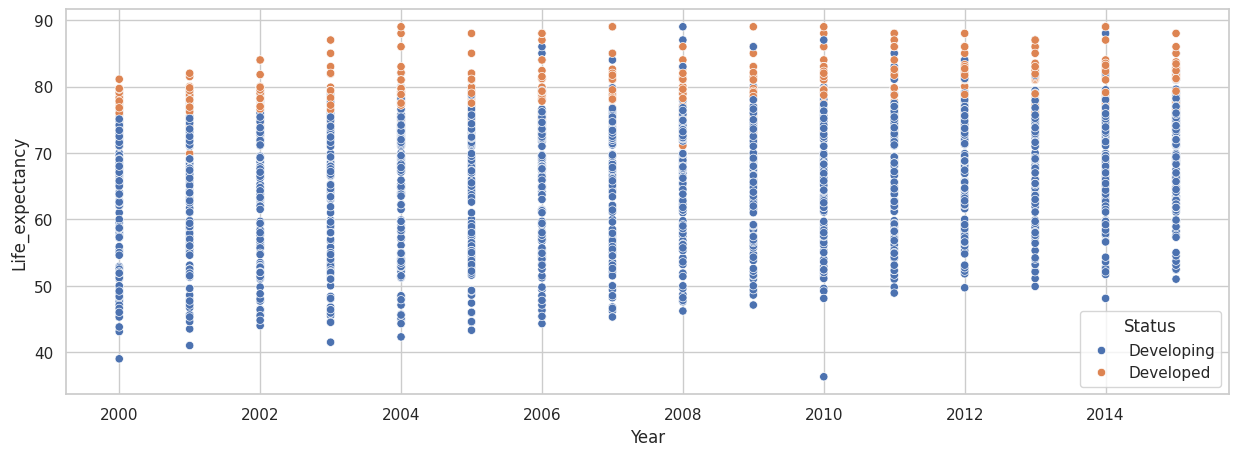

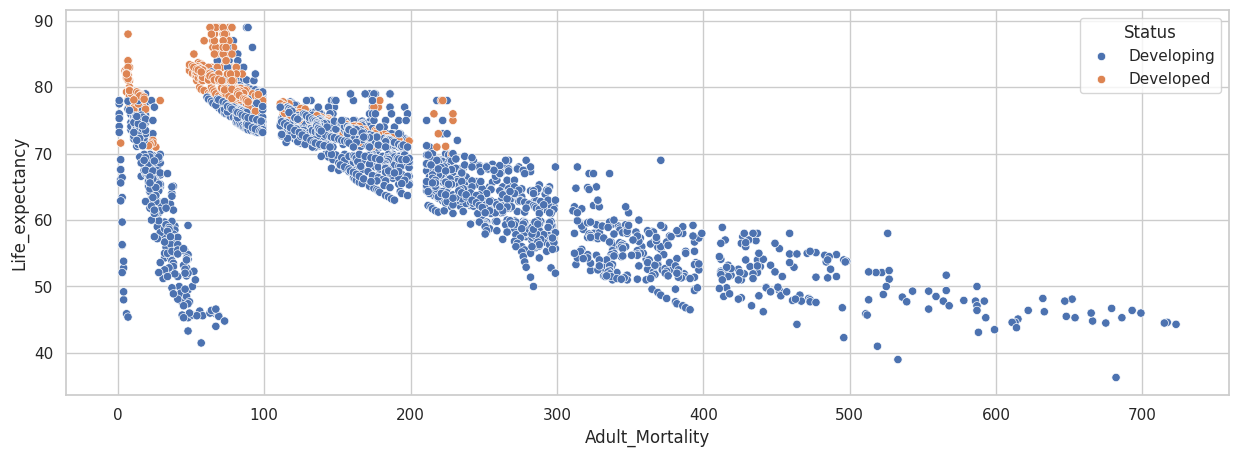

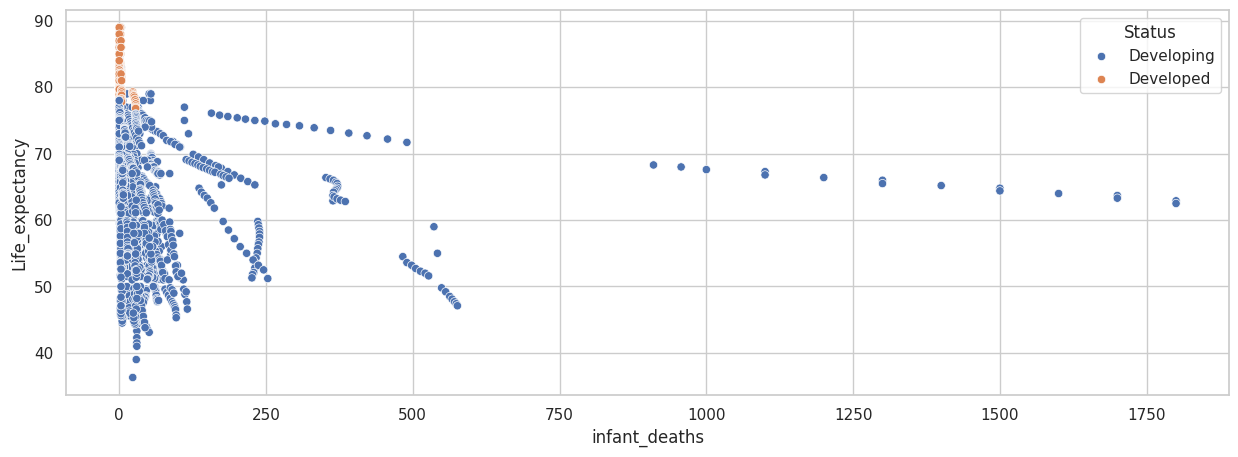

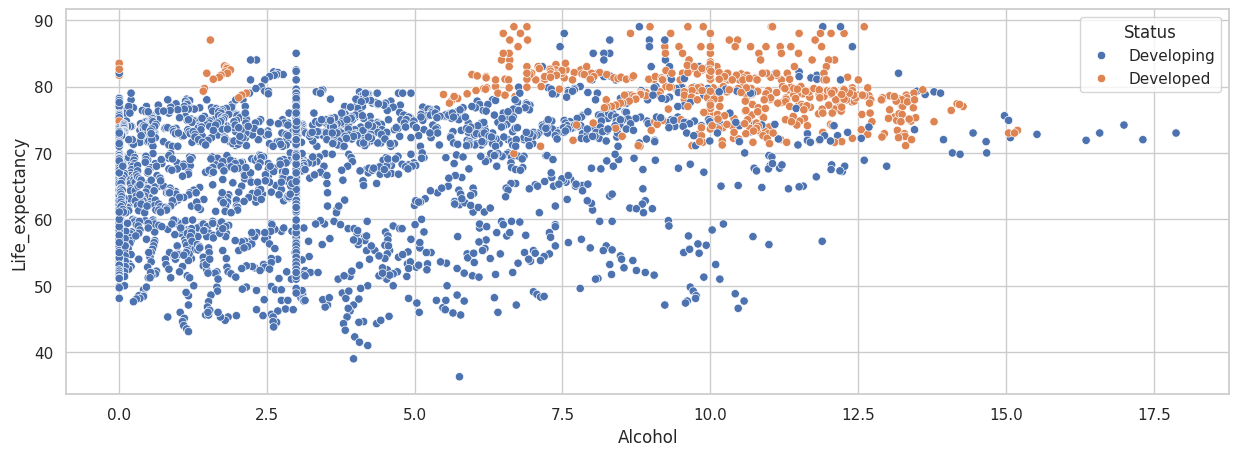

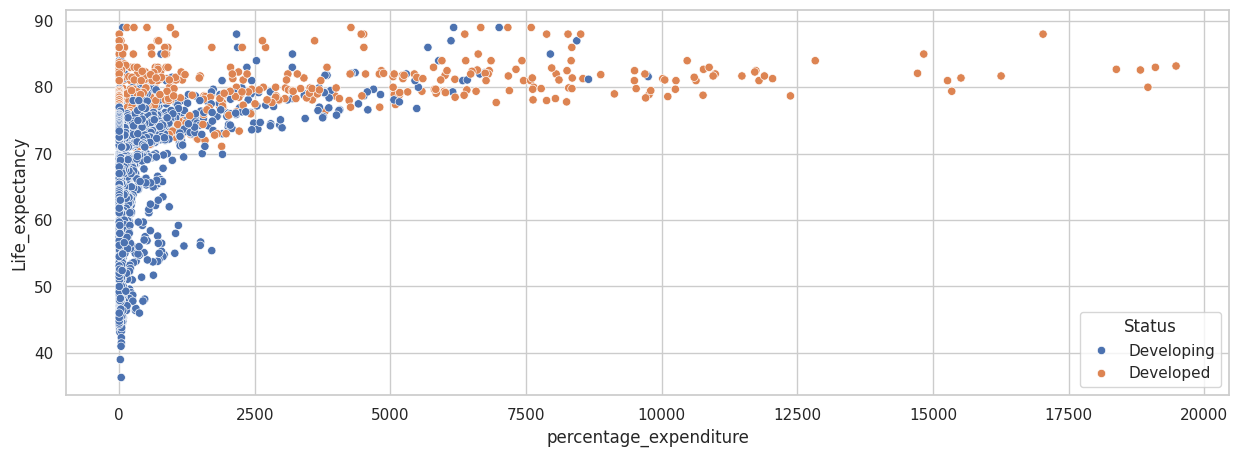

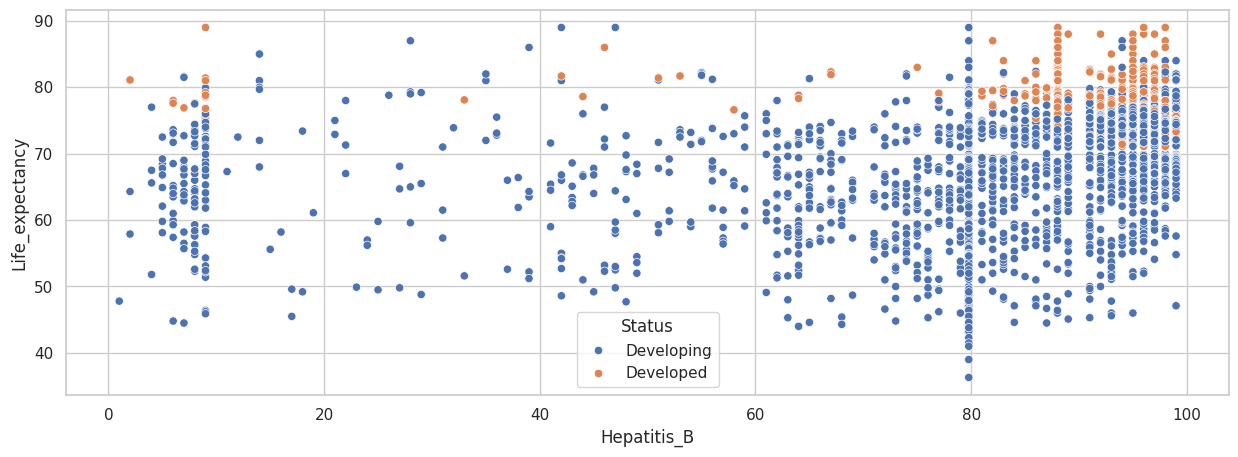

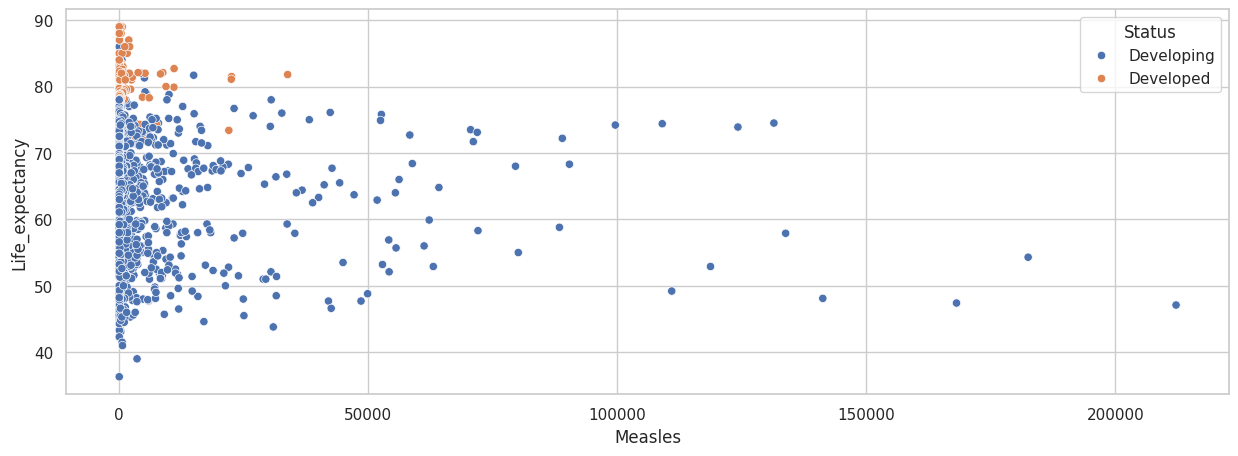

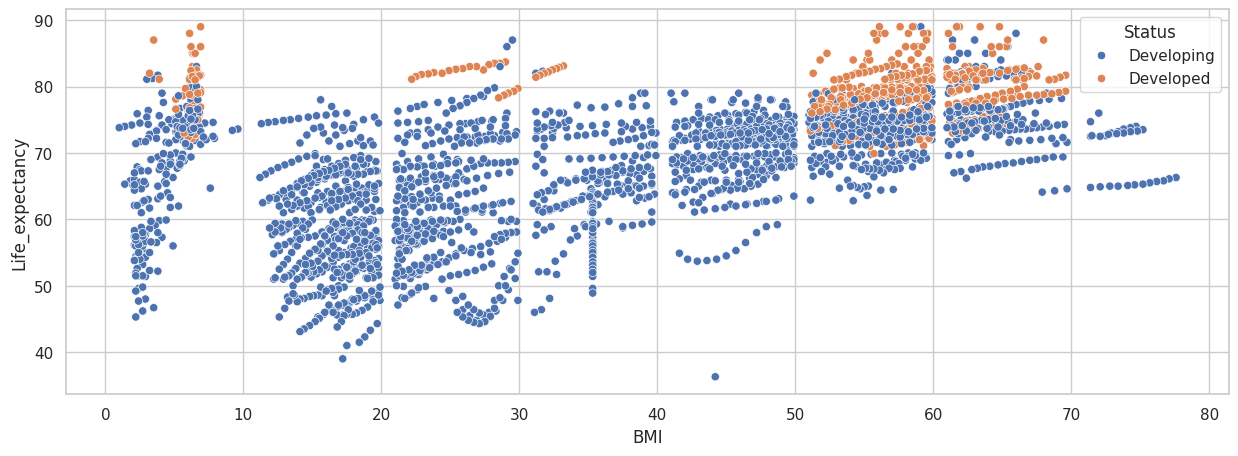

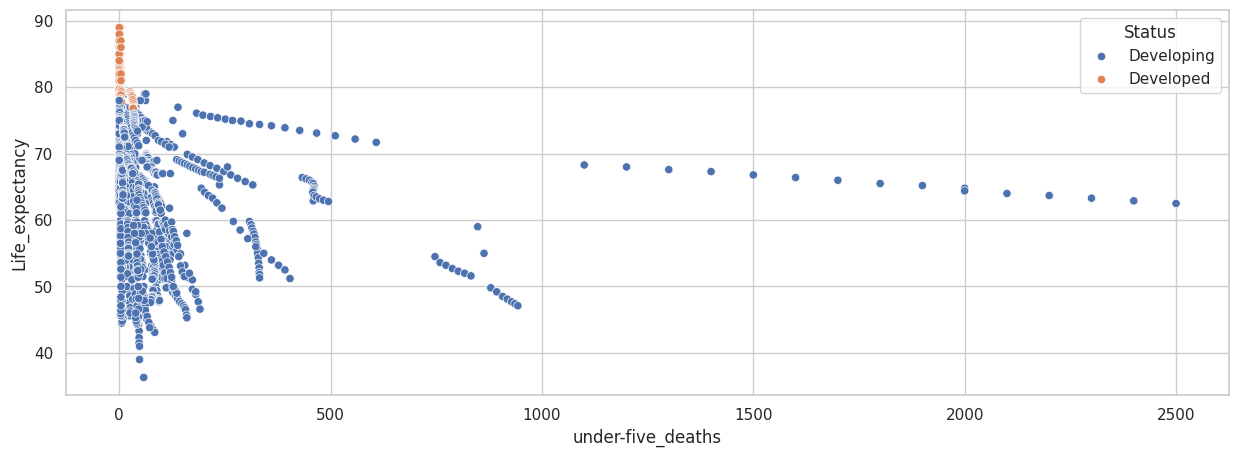

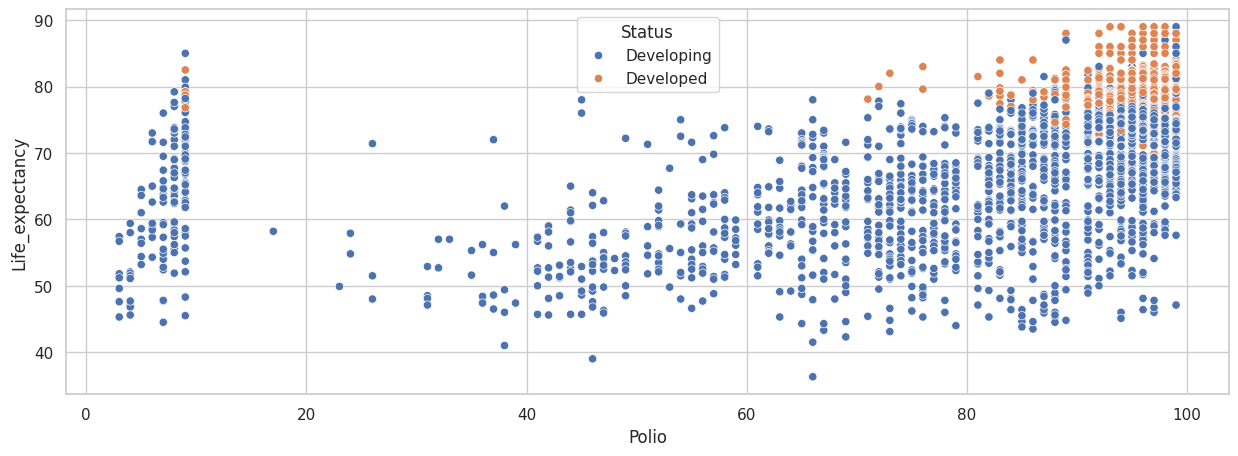

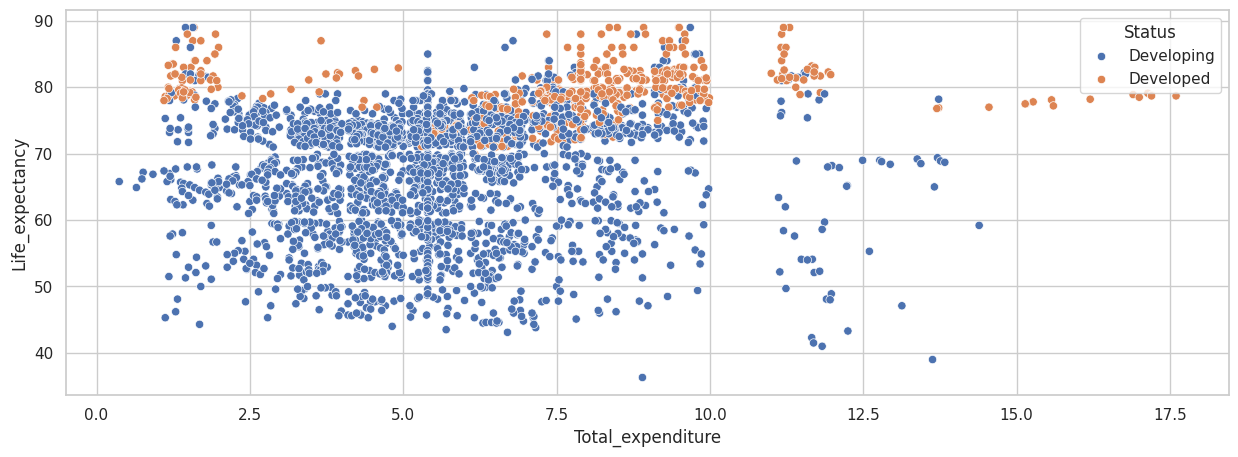

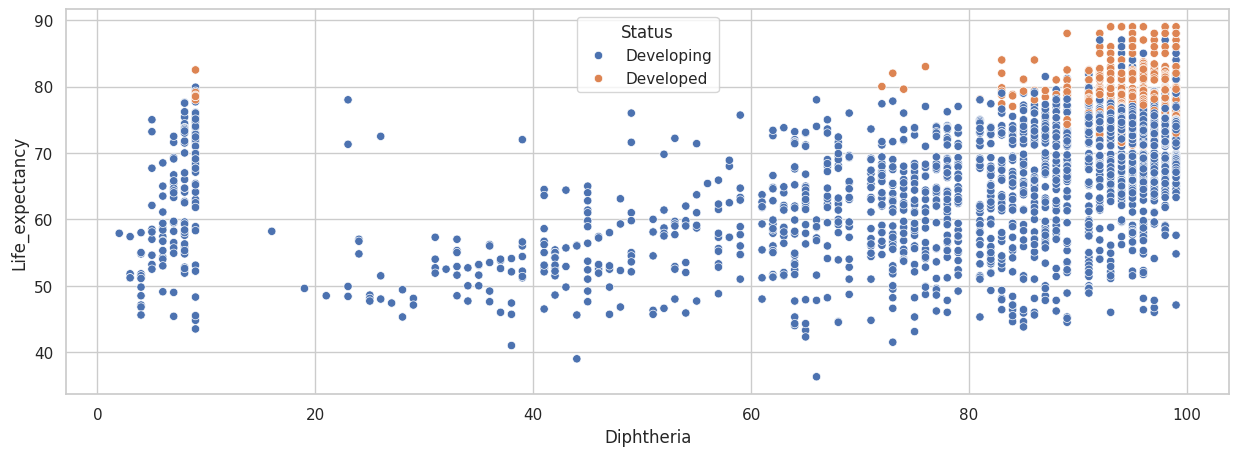

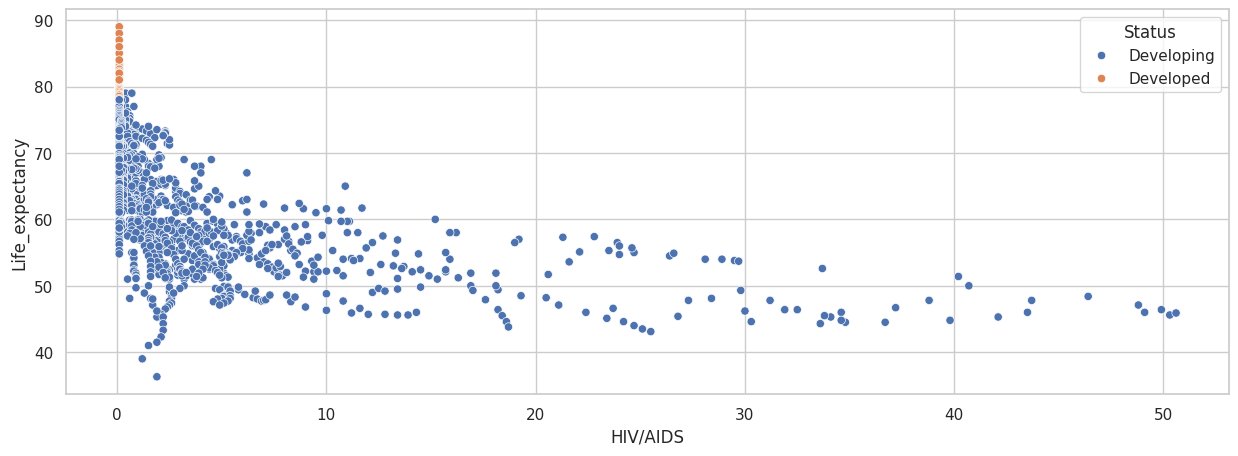

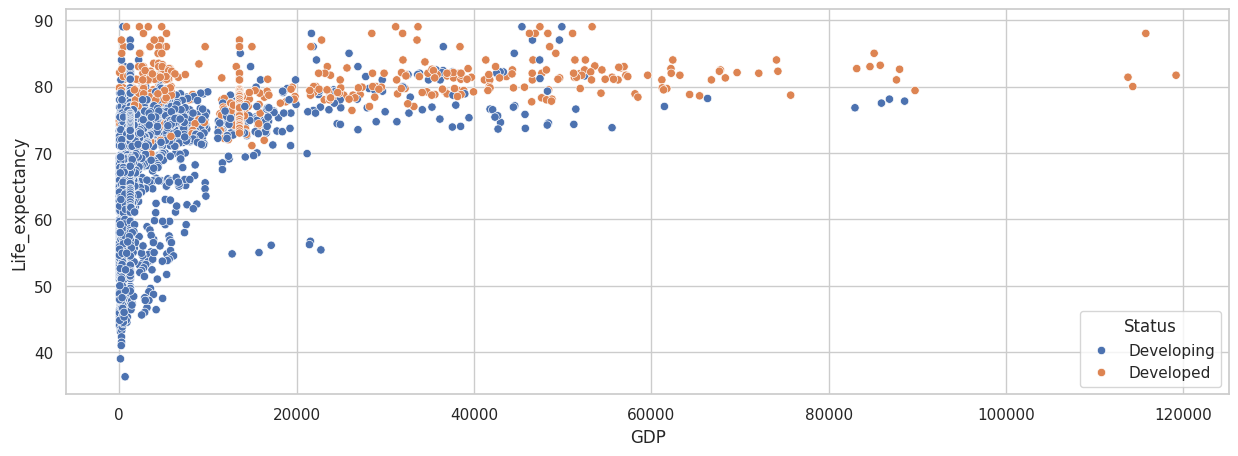

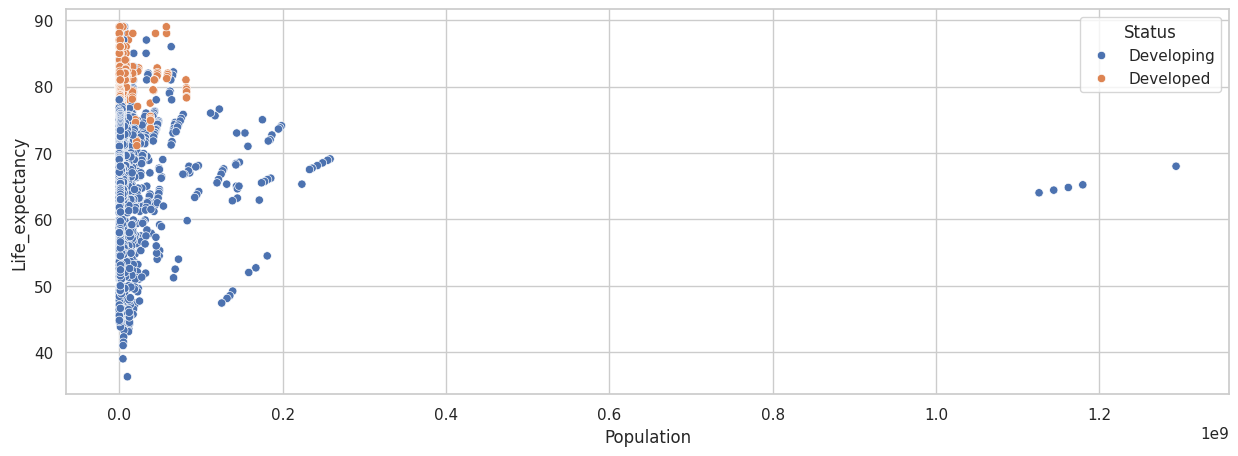

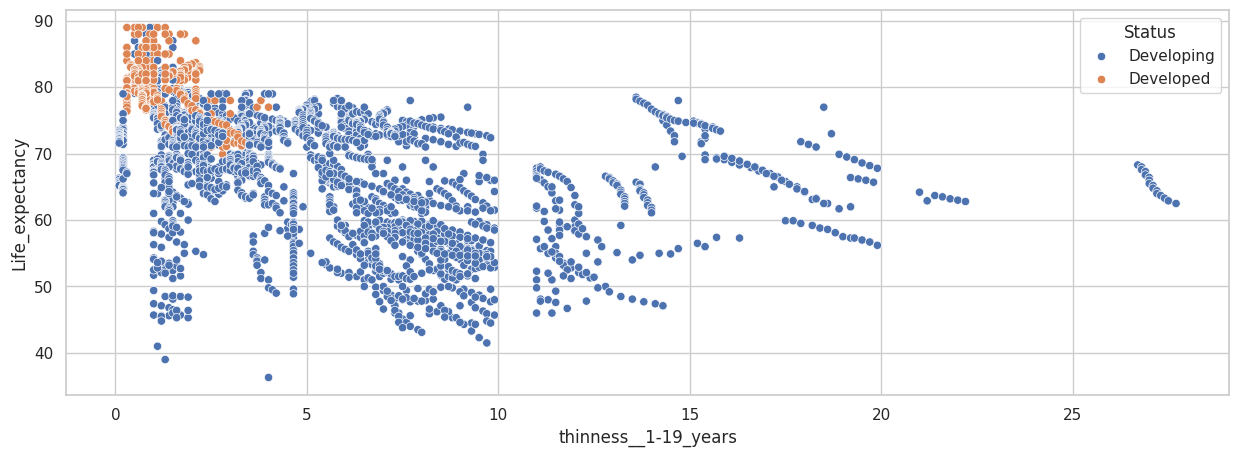

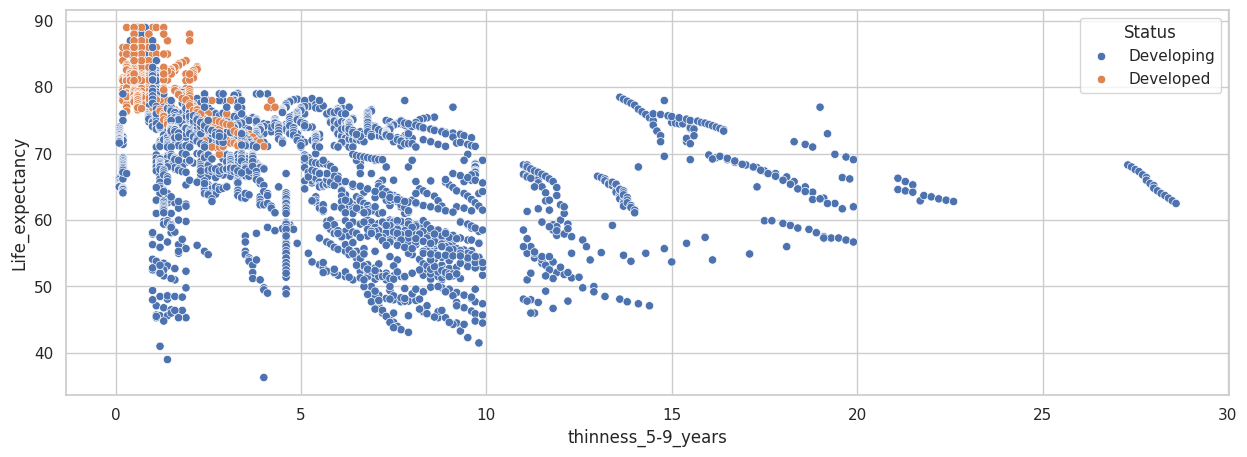

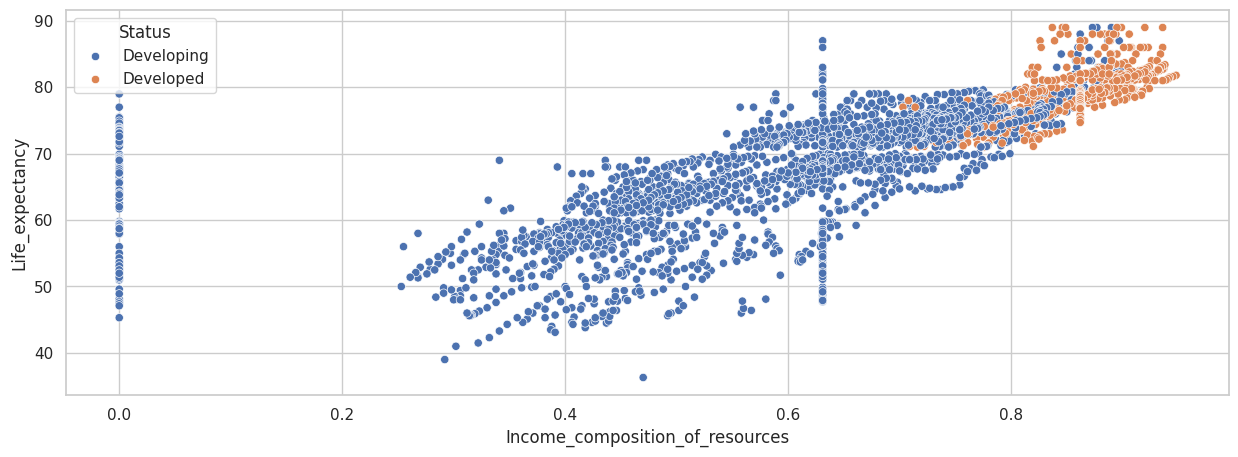

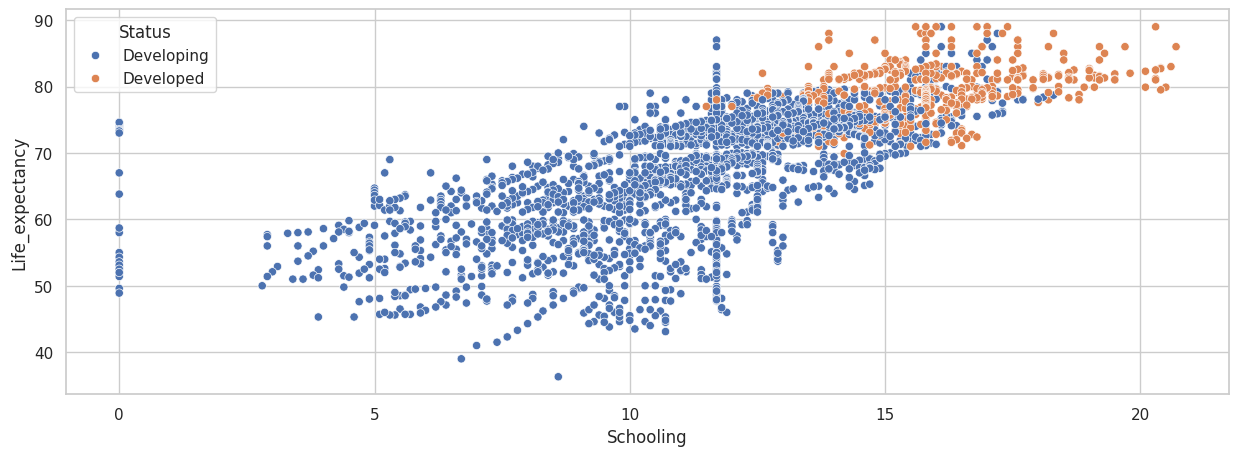

In [83]:
for i in num_cols1:
  plt.figure(figsize=(15,5))
  sns.scatterplot(data=data, x=i, y='Life_expectancy', hue='Status')
  plt.show()

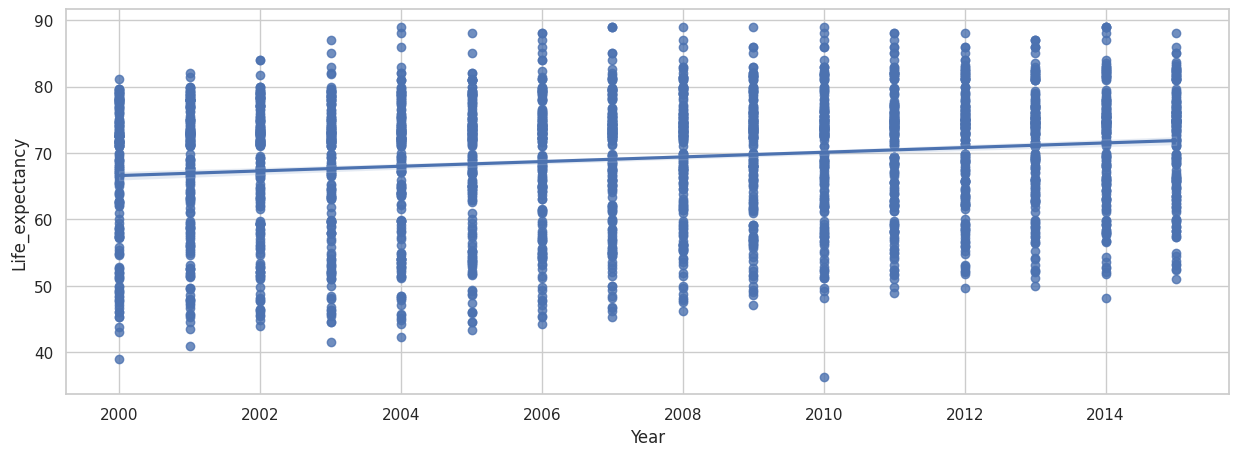

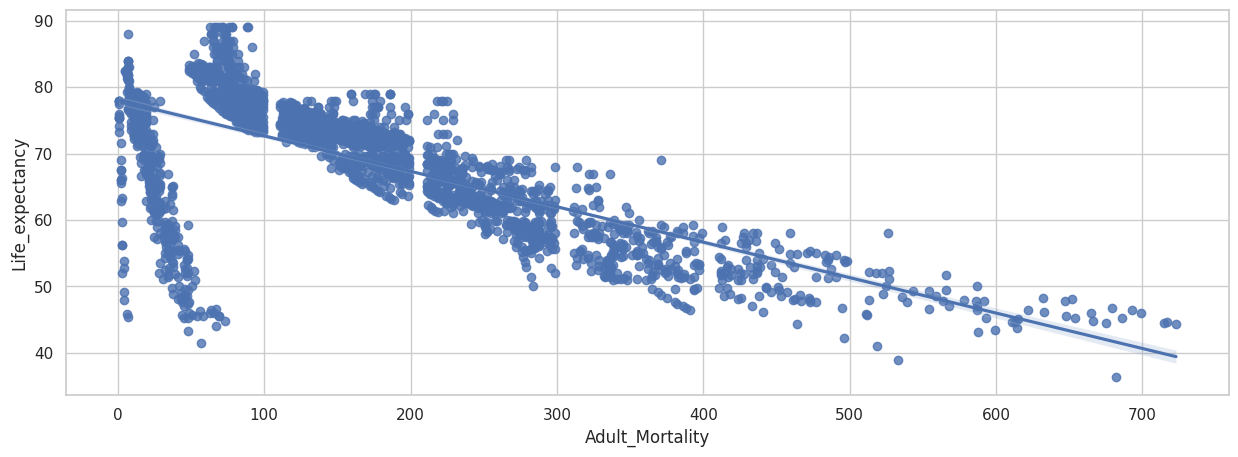

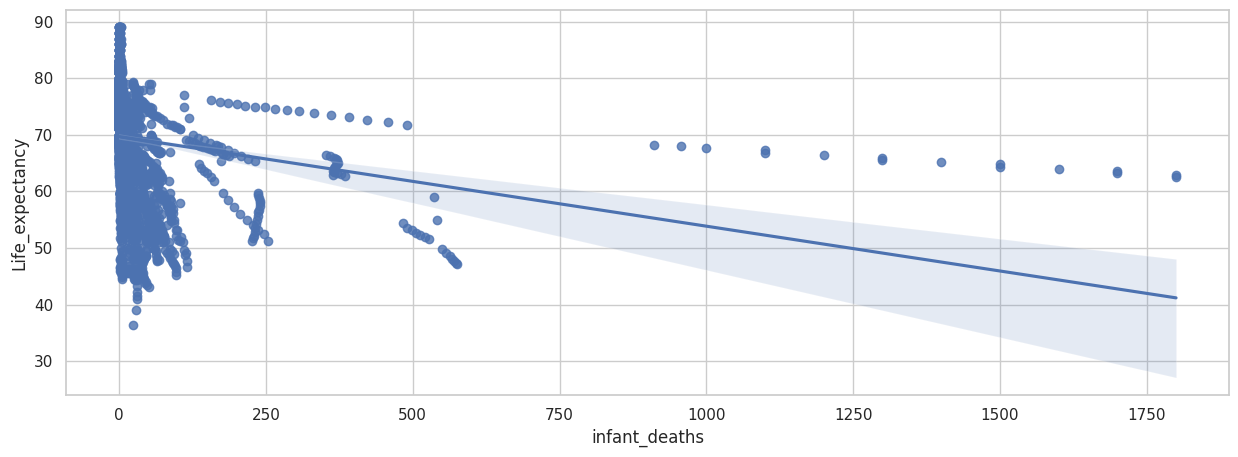

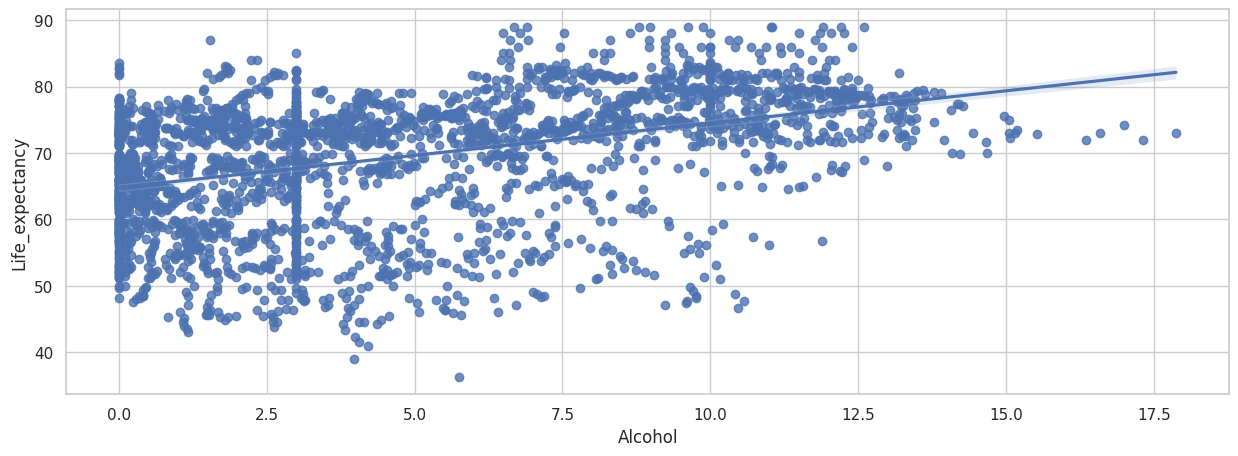

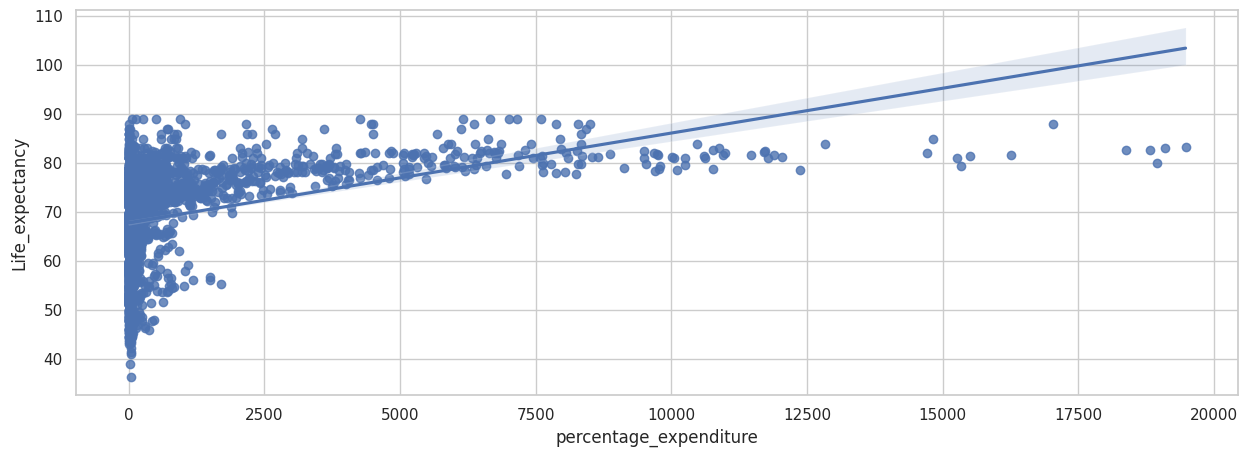

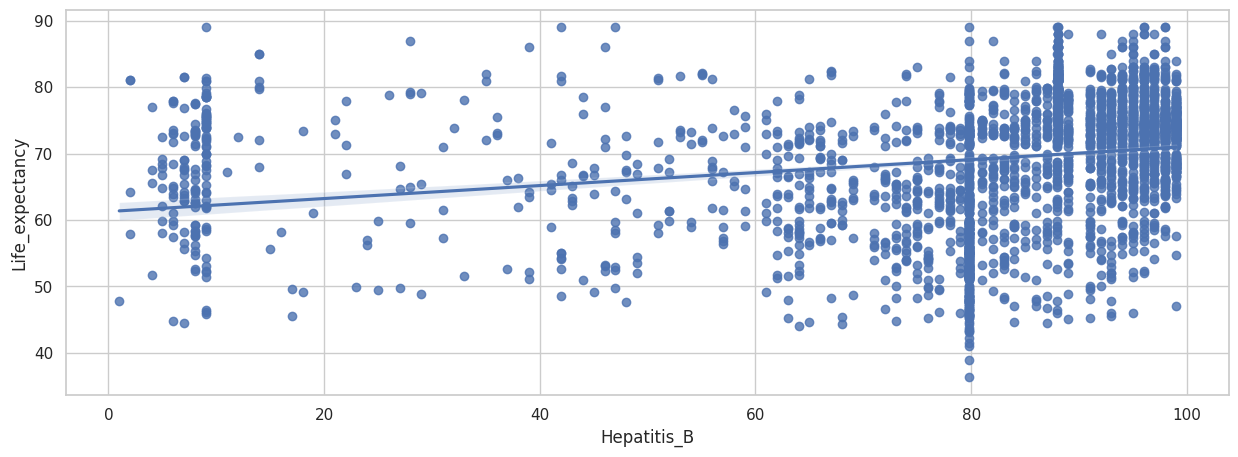

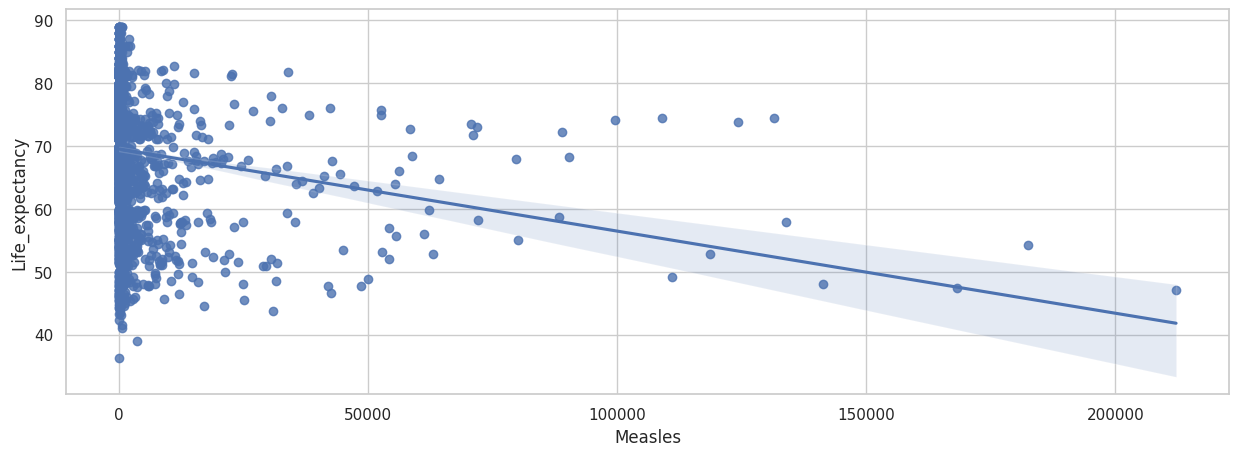

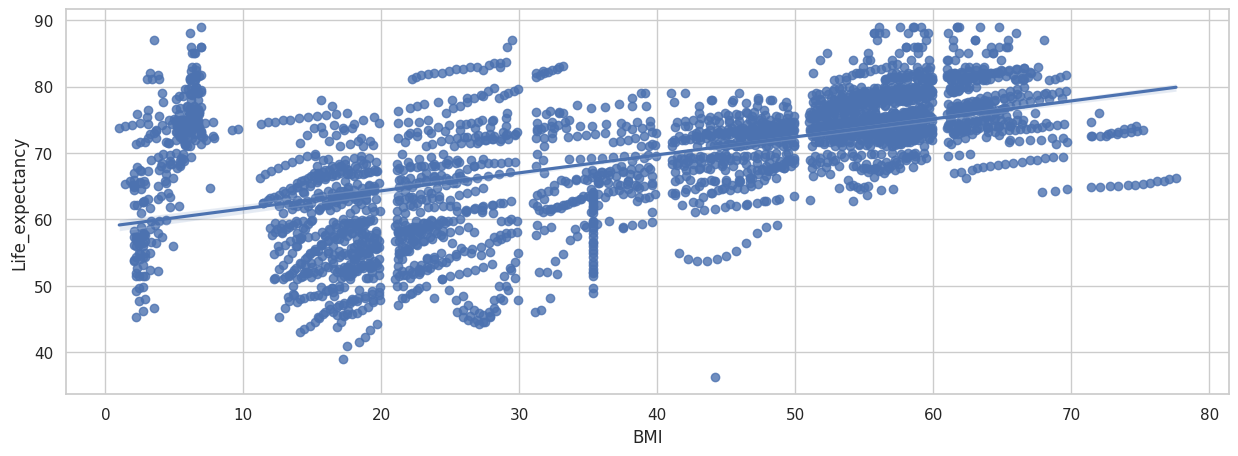

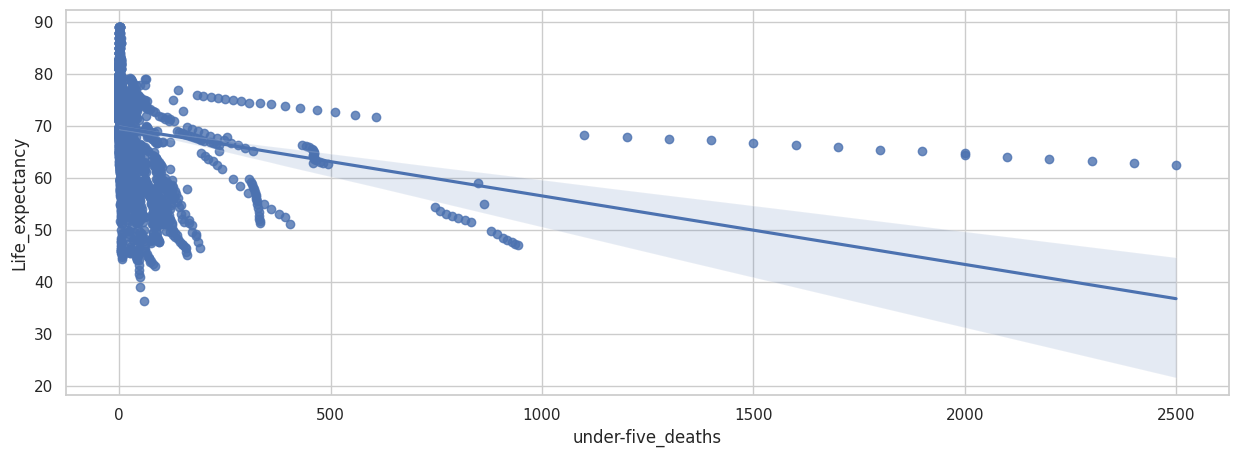

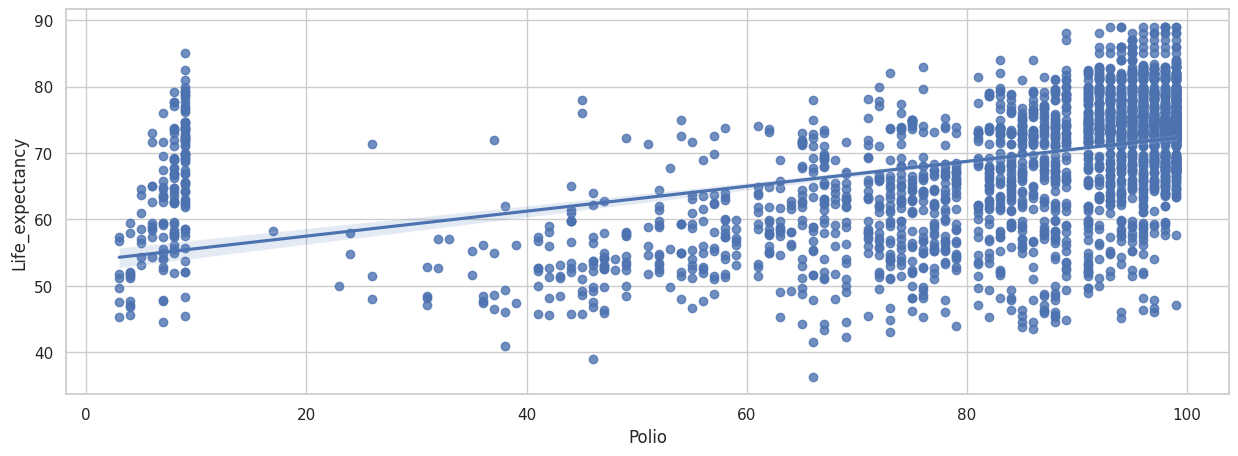

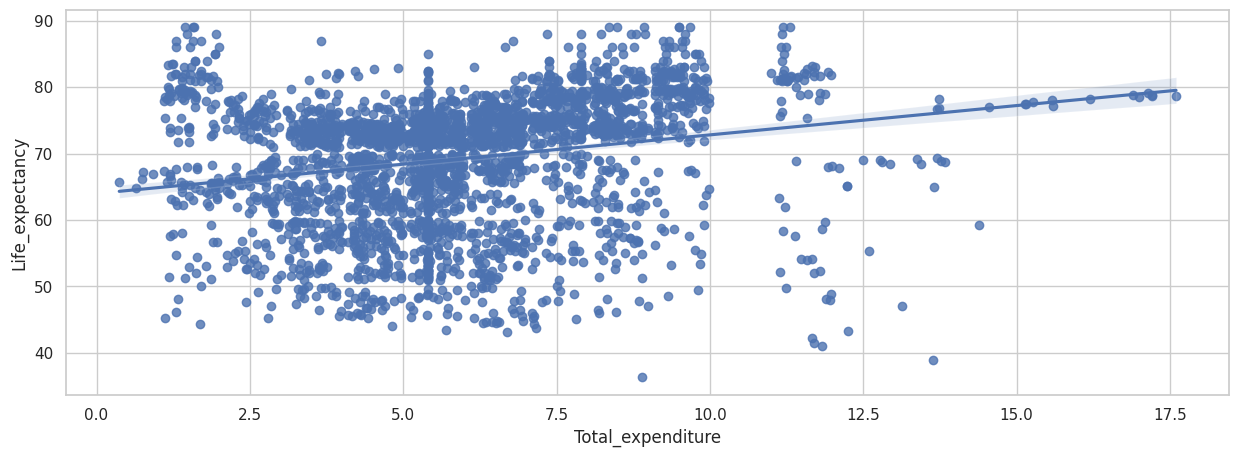

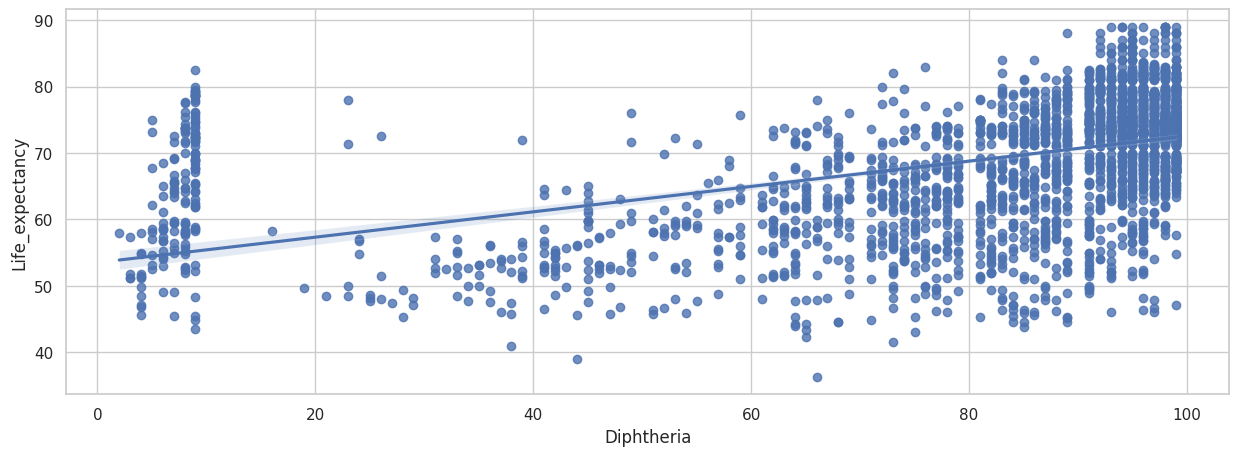

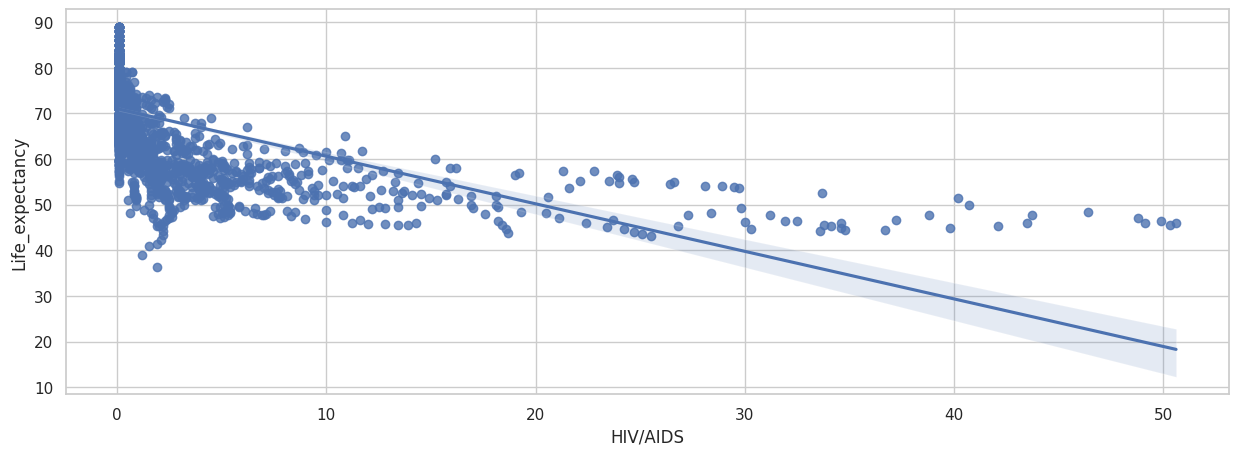

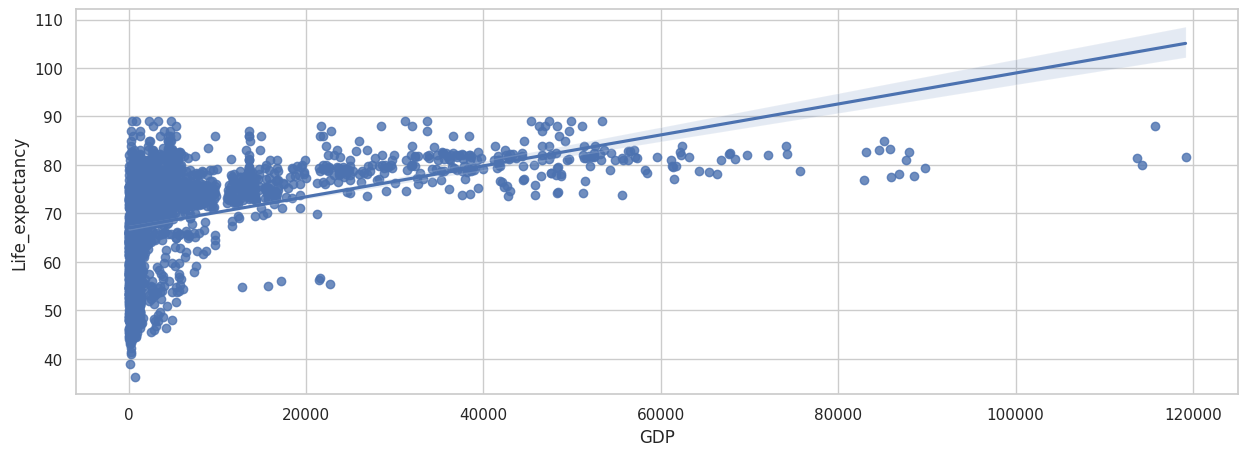

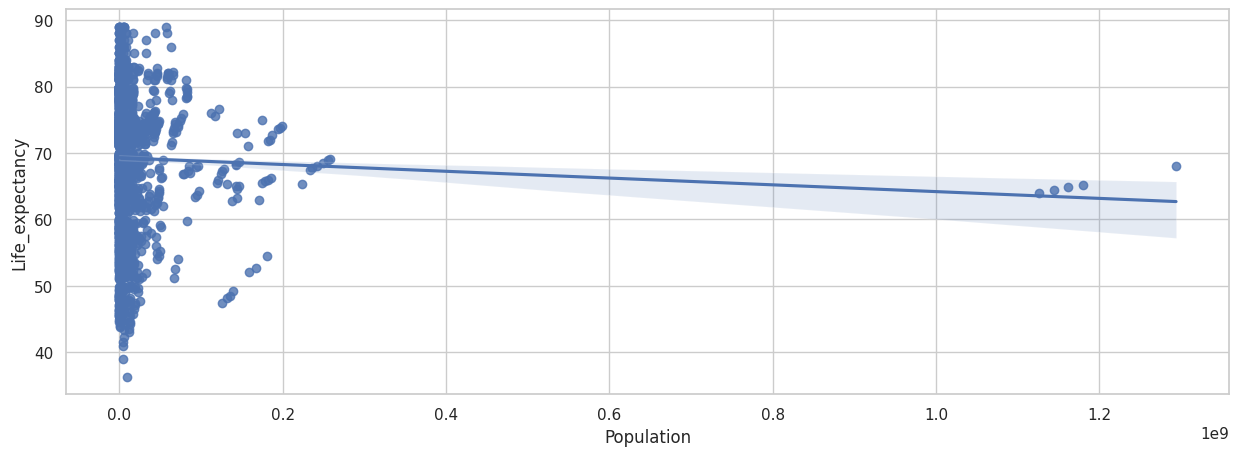

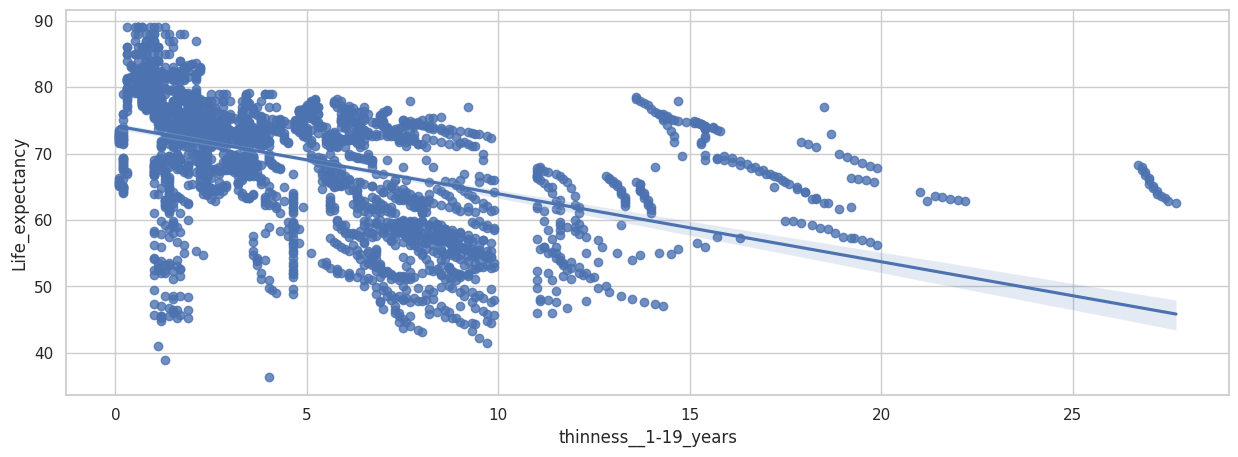

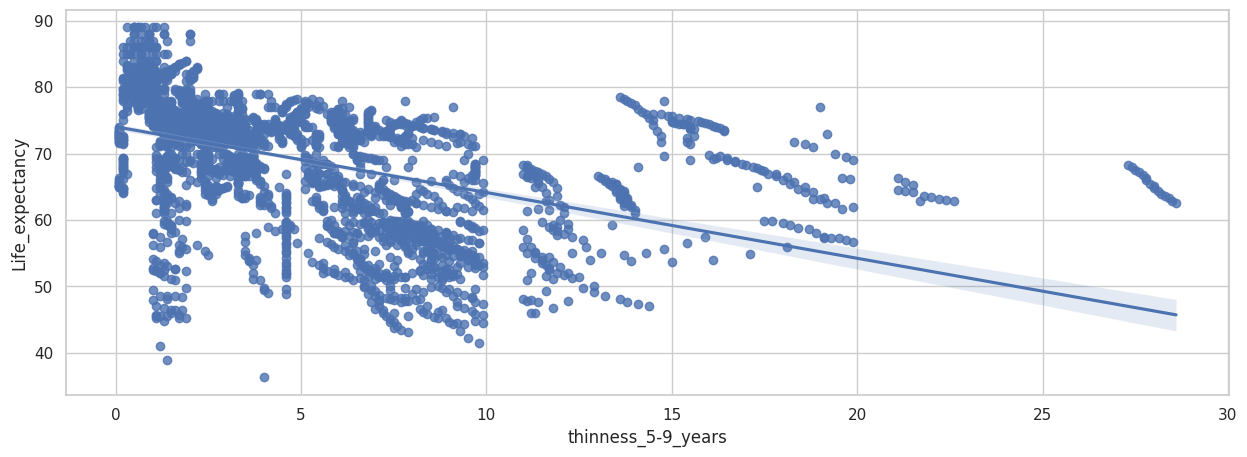

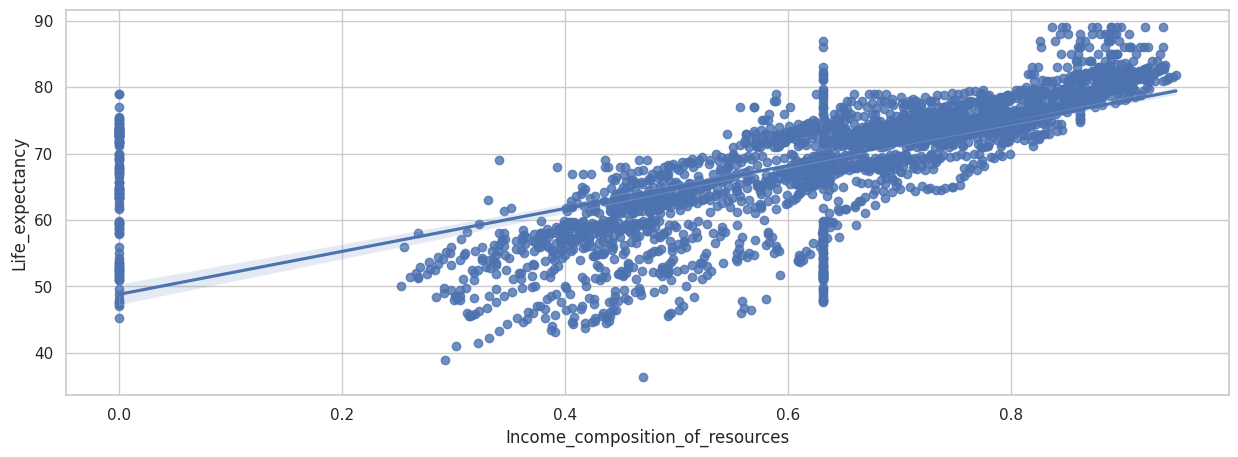

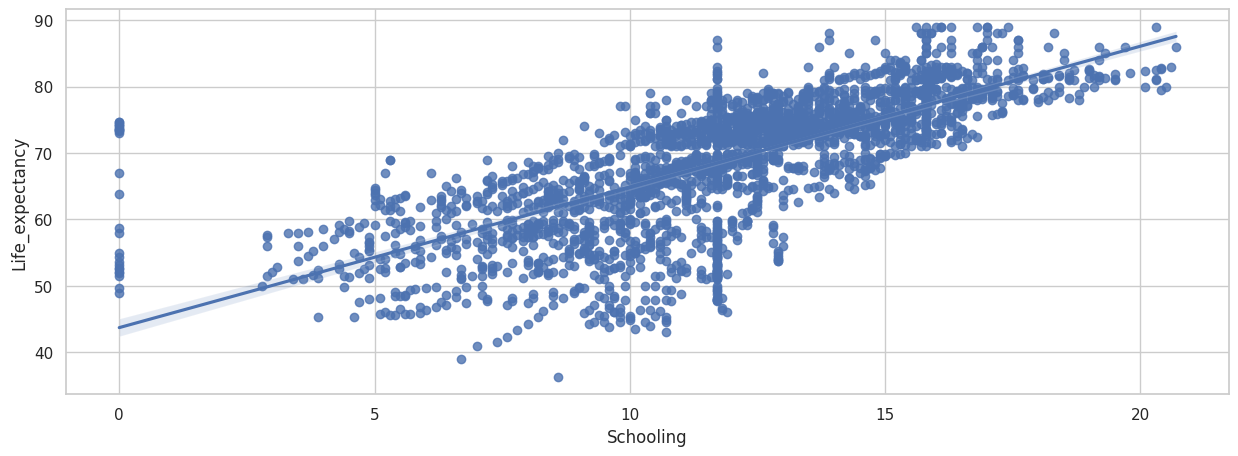

In [84]:
for i in num_cols1:
  plt.figure(figsize=(15,5))
  sns.regplot(data=data, x=i, y='Life_expectancy')
  plt.show()

In [85]:
data.to_csv('Life_expectancy_cleaned.csv', index=False)

In [86]:
data_c = pd.read_csv('Life_expectancy_cleaned.csv')
data_c.head()

Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles   BMI  \
0             62     0.01               71.279624         65.0     1154  19.1   
1             64     0.01               73.523582         62.0      492  18.6   
2             66     0.01               73.219243         64.0      430  18.1   
3             69     0.01               78.184215         67.0     2787  17.6   
4             71     0.01                7.097109         68.0     3013  17.2   

   under-five_deaths  Polio  Total_expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Population  thinness__1-19_years  thinness_5-9_years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   

   Income_composition_of_resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

# Handling categorical data

In [87]:
cat_cols

Index(['Country', 'Status'], dtype='object')

In [88]:
for i in cat_cols:
  print(i, data_c[i].nunique())
  print(data_c[i].value_counts())

Country 183
Country
Afghanistan                                             16
Albania                                                 16
Algeria                                                 16
Angola                                                  16
Antigua and Barbuda                                     16
Argentina                                               16
Armenia                                                 16
Australia                                               16
Austria                                                 16
Azerbaijan                                              16
Bahamas                                                 16
Bahrain                                                 16
Bangladesh                                              16
Barbados                                                16
Belarus                                                 16
Belgium                                                 16
Belize                              

In [89]:
data_c['Status'] = data_c['Status'].map({'Developed':1, 'Developing':0})
data_c.head()

Country  Year  Status  Life_expectancy  Adult_Mortality  infant_deaths  \
0  Afghanistan  2015       0             65.0            263.0             62   
1  Afghanistan  2014       0             59.9            271.0             64   
2  Afghanistan  2013       0             59.9            268.0             66   
3  Afghanistan  2012       0             59.5            272.0             69   
4  Afghanistan  2011       0             59.2            275.0             71   

   Alcohol  percentage_expenditure  Hepatitis_B  Measles   BMI  \
0     0.01               71.279624         65.0     1154  19.1   
1     0.01               73.523582         62.0      492  18.6   
2     0.01               73.219243         64.0      430  18.1   
3     0.01               78.184215         67.0     2787  17.6   
4     0.01                7.097109         68.0     3013  17.2   

   under-five_deaths  Polio  Total_expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Population  thinness__1-19_years  thinness_5-9_years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   

   Income_composition_of_resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_c['Country'] = le.fit_transform(data_c['Country'])
data_c.head()


Country  Year  Status  Life_expectancy  Adult_Mortality  infant_deaths  \
0        0  2015       0             65.0            263.0             62   
1        0  2014       0             59.9            271.0             64   
2        0  2013       0             59.9            268.0             66   
3        0  2012       0             59.5            272.0             69   
4        0  2011       0             59.2            275.0             71   

   Alcohol  percentage_expenditure  Hepatitis_B  Measles   BMI  \
0     0.01               71.279624         65.0     1154  19.1   
1     0.01               73.523582         62.0      492  18.6   
2     0.01               73.219243         64.0      430  18.1   
3     0.01               78.184215         67.0     2787  17.6   
4     0.01                7.097109         68.0     3013  17.2   

   under-five_deaths  Polio  Total_expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Population  thinness__1-19_years  thinness_5-9_years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   

   Income_composition_of_resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [91]:
#sns.heatmap(data_c.corr(), fmt=".1f", cmap = 'coolwarm')

In [92]:
data_c.corr()

Country          Year        Status  \
Country                          1.000000e+00  3.332312e-14  3.267863e-02   
Year                             3.332312e-14  1.000000e+00  5.545187e-15   
Status                           3.267863e-02  5.545187e-15  1.000000e+00   
Life_expectancy                 -1.790104e-02  1.700330e-01  4.821361e-01   
Adult_Mortality                  4.026192e-02 -7.905159e-02 -3.152844e-01   
infant_deaths                   -2.894155e-02 -3.646405e-02 -1.127082e-01   
Alcohol                         -6.494406e-02 -5.634356e-02  6.103574e-01   
percentage_expenditure          -3.226254e-02  3.272257e-02  4.540322e-01   
Hepatitis_B                     -1.197391e-02  9.341542e-02  1.388445e-01   
Measles                         -2.307884e-02 -8.184033e-02 -7.731993e-02   
BMI                              1.439362e-02  1.040819e-01  3.154252e-01   
under-five_deaths               -2.488456e-02 -4.197985e-02 -1.156615e-01   
Polio                            2.093101e-02  9.220086e-02  2.195258e-01   
Total_expenditure                4.989561e-02  7.548563e-02  3.184844e-01   
Diphtheria                      -3.170208e-03  1.323293e-01  2.161689e-01   
HIV/AIDS                         9.204725e-02 -1.387885e-01 -1.491780e-01   
GDP                             -1.935797e-02  9.284600e-02  4.884442e-01   
Population                      -1.916384e-02  1.474940e-02 -3.821622e-02   
thinness__1-19_years             9.401378e-03 -4.483492e-02 -3.694315e-01   
thinness_5-9_years               2.352522e-02 -4.788736e-02 -3.676926e-01   
Income_composition_of_resources -1.093927e-02  2.337707e-01  4.930752e-01   
Schooling                       -1.083211e-02  2.050672e-01  5.305006e-01   

                                 Life_expectancy  Adult_Mortality  \
Country                                -0.017901         0.040262   
Year                                    0.170033        -0.079052   
Status                                  0.482136        -0.315284   
Life_expectancy                         1.000000        -0.696359   
Adult_Mortality                        -0.696359         1.000000   
infant_deaths                          -0.196557         0.078756   
Alcohol                                 0.404918        -0.201209   
percentage_expenditure                  0.381864        -0.242860   
Hepatitis_B                             0.231830        -0.155714   
Measles                                -0.157586         0.031176   
BMI                                     0.564305        -0.385256   
under-five_deaths                      -0.222529         0.094146   
Polio                                   0.460104        -0.271140   
Total_expenditure                       0.222242        -0.120660   
Diphtheria                              0.473910        -0.271415   
HIV/AIDS                               -0.556556         0.523821   
GDP                                     0.447771        -0.295310   
Population                             -0.028975        -0.005298   
thinness__1-19_years                   -0.472177         0.299743   
thinness_5-9_years                     -0.466401         0.305051   
Income_composition_of_resources         0.703099        -0.449766   
Schooling                               0.731799        -0.449758   

                                 infant_deaths   Alcohol  \
Country                              -0.028942 -0.064944   
Year                                 -0.036464 -0.056344   
Status                               -0.112708  0.610357   
Life_expectancy                      -0.196557  0.404918   
Adult_Mortality                       0.078756 -0.201209   
infant_deaths                         1.000000 -0.116055   
Alcohol                              -0.116055  1.000000   
percentage_expenditure               -0.085906  0.338523   
Hepatitis_B                          -0.185492  0.101976   
Measles                               0.501038 -0.052148   
BMI               

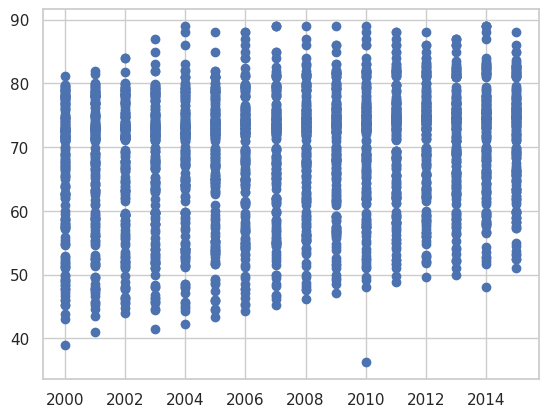

In [93]:
plt.scatter(data_c['Year'], data_c['Life_expectancy'])
plt.show()

# Split the data

In [94]:
x = data_c.drop('Life_expectancy', axis=1)
y = data_c['Life_expectancy']

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [96]:
len(x_train), len(x_test), len(x_val)

(2196, 366, 366)

In [97]:
len(y_train), len(y_test), len(y_val)

(2196, 366, 366)

# Feature Scaling

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_val = sc.transform(x_val)

In [99]:
pd.DataFrame(x_train).head()

0         1         2         3         4         5         6   \
0 -0.340107 -0.771430  2.172268 -0.812292 -0.263660  0.564630  3.980430   
1  1.085627 -0.987785 -0.460348  1.438098  0.155764 -1.149314 -0.374618   
2 -1.024460 -0.987785 -0.460348  2.026909 -0.185018 -0.532496 -0.374618   
3 -0.853371 -0.555075  2.172268 -0.594512 -0.263660  1.699675  3.530549   
4 -0.245058  0.093990  2.172268 -0.731633 -0.263660  2.048531  4.503751   

         7         8         9         10        11        12        13  \
0  0.307667 -0.210002  0.920696 -0.267716  0.709967  1.519663  0.706599   
1 -0.056856  0.502075 -0.957815  0.227591 -3.349598 -0.207208 -3.242996   
2 -0.056856  0.110118 -1.774341 -0.178815 -3.306866 -1.357081 -3.201421   
3  0.307667 -0.209829  0.845555 -0.267716  0.453573  1.593848  0.457151   
4  0.307667 -0.205086  0.965780 -0.267716  0.453573  1.128129  0.457151   

         14        15        16        17        18        19        20  
0 -0.324668  3.002632 -0.196233 -0.872535 -0.882716  1.176468  1.889969  
1 -0.167257 -0.416689 -0.168477  0.647341  0.581768 -0.005784 -0.111204  
2  0.993643 -0.416689 -0.168477  0.964927  0.870227 -0.684846 -0.808582  
3 -0.324668  3.143570 -0.088108 -0.827166 -0.860527  1.293716  1.374515  
4 -0.324668  4.074567 -0.106761 -1.031328 -1.038040  1.347455  1.768686

# Checking multi-collinearity

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_train
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = pd.DataFrame(variable).columns
vif

VIF  Features
0     1.032917         0
1     1.154092         1
2     2.045842         2
3     1.738338         3
4   171.299075         4
5     2.055228         5
6     4.997242         6
7     1.422549         7
8     1.355229         8
9     1.762348         9
10  169.573581        10
11    1.923459        11
12    1.217865        12
13    2.195883        13
14    1.424976        14
15    5.436275        15
16    1.398717        16
17    7.836479        17
18    7.973837        18
19    3.179336        19
20    3.587913        20

# Model Building

## Linear Models

In [103]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
def cross_validation(model, x_train, y_train, cv=10):
    scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    # print(training_accuracy.mean())
    return scores.mean()


In [105]:
from sklearn.linear_model import LinearRegression

def simple_linear_regression(x_train, x_test, y_train, y_test):
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Linear Regression - MSE: {mse:.4f}, R²: {r2:.4f}")
    return model


In [106]:
simple_linear_regression(x_train, x_test, y_train, y_test)

Linear Regression - MSE: 15.1132, R²: 0.8346


LinearRegression()

In [107]:
lr_model = simple_linear_regression(x_train, x_test, y_train, y_test)
cross_validation(lr_model, x_train, y_train, cv=10)

Linear Regression - MSE: 15.1132, R²: 0.8346


np.float64(-16.611422372193516)

In [108]:
def polynomial_regression(x_train, x_test, y_train, y_test, degree=2):
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    y_pred = model.predict(x_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Polynomial Regression (degree={degree}) - MSE: {mse:.4f}, R²: {r2:.4f}")
    return model, poly


In [109]:
polynomial_regression(x_train, x_test, y_train, y_test, degree=2)

Polynomial Regression (degree=2) - MSE: 7.7456, R²: 0.9153


(LinearRegression(), PolynomialFeatures())

In [110]:
from sklearn.linear_model import Ridge

def ridge_regression(X_train, X_test, y_train, y_test, alpha=1.0):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Ridge Regression (alpha={alpha}) - MSE: {mse:.4f}, R²: {r2:.4f}")
    return model


In [111]:
ridge_regression(x_train, x_test, y_train, y_test, alpha=1.0)

Ridge Regression (alpha=1.0) - MSE: 15.1059, R²: 0.8347


Ridge()

In [112]:
ridge_regression(x_train, x_test, y_train, y_test, alpha=0.5)

Ridge Regression (alpha=0.5) - MSE: 15.1071, R²: 0.8347


Ridge(alpha=0.5)

In [113]:
ridge_regression(x_train, x_test, y_train, y_test, alpha=3)

Ridge Regression (alpha=3) - MSE: 15.1245, R²: 0.8345


Ridge(alpha=3)

In [114]:
from sklearn.linear_model import Lasso

def lasso_regression(X_train, X_test, y_train, y_test, alpha=0.1):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Lasso Regression (alpha={alpha}) - MSE: {mse:.4f}, R²: {r2:.4f}")
    return model


In [115]:
lasso_regression(x_train, x_test, y_train, y_test, alpha=0.1)

Lasso Regression (alpha=0.1) - MSE: 15.6738, R²: 0.8285


Lasso(alpha=0.1)

In [116]:
lasso_regression(x_train, x_test, y_train, y_test, alpha=0.01)

Lasso Regression (alpha=0.01) - MSE: 15.1144, R²: 0.8346


Lasso(alpha=0.01)

In [117]:
lasso_regression(x_train, x_test, y_train, y_test, alpha=0.001)

Lasso Regression (alpha=0.001) - MSE: 15.1087, R²: 0.8347


Lasso(alpha=0.001)

In [118]:
from sklearn.linear_model import ElasticNet

def elastic_net(X_train, X_test, y_train, y_test, alpha=0.1, l1_ratio=0.5):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Elastic Net (alpha={alpha}, l1_ratio={l1_ratio}) - MSE: {mse:.4f}, R²: {r2:.4f}")
    return model


In [119]:
elastic_net(x_train, x_test, y_train, y_test, alpha=0.01, l1_ratio=1.0)

Elastic Net (alpha=0.01, l1_ratio=1.0) - MSE: 15.1144, R²: 0.8346


ElasticNet(alpha=0.01, l1_ratio=1.0)

## Tree Regressor

In [120]:
from sklearn.tree import DecisionTreeRegressor

def decision_tree(X_train, X_test, y_train, y_test, max_depth=None):
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Decision Tree (max_depth={max_depth}) - MSE: {mse:.4f}, R²: {r2:.4f}")
    return model


In [121]:
decision_tree(x_train, x_test, y_train, y_test, max_depth=None)

Decision Tree (max_depth=None) - MSE: 6.2828, R²: 0.9313


DecisionTreeRegressor(random_state=42)

In [122]:
dt_model = decision_tree(x_train, x_test, y_train, y_test, max_depth=None)
cross_validation(dt_model, x_train, y_train, cv=10)

Decision Tree (max_depth=None) - MSE: 6.2828, R²: 0.9313


np.float64(-8.093445246990452)

In [123]:
from sklearn.ensemble import RandomForestRegressor

def random_forest(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=None):
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Random Forest (n_estimators={n_estimators}, max_depth={max_depth}) - MSE: {mse:.4f}, R²: {r2:.4f}")
    return model


In [124]:
random_forest(x_train, x_test, y_train, y_test, n_estimators=100, max_depth=None)

Random Forest (n_estimators=100, max_depth=None) - MSE: 2.6594, R²: 0.9709


RandomForestRegressor(random_state=42)

In [125]:
rf_model = random_forest(x_train, x_test, y_train, y_test, n_estimators=100, max_depth=None)
cross_validation(rf_model, x_train, y_train, cv=10)

Random Forest (n_estimators=100, max_depth=None) - MSE: 2.6594, R²: 0.9709


np.float64(-3.8824636500145298)

In [126]:
from sklearn.ensemble import GradientBoostingRegressor

def gradient_boosting(X_train, X_test, y_train, y_test, n_estimators=100, learning_rate=0.1, max_depth=3):
    model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate,
                                       max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Gradient Boosting (n_estimators={n_estimators}, learning_rate={learning_rate}) - MSE: {mse:.4f}, R²: {r2:.4f}")
    return model


In [127]:
gradient_boosting(x_train, x_test, y_train, y_test, n_estimators=100, learning_rate=0.1, max_depth=3)

Gradient Boosting (n_estimators=100, learning_rate=0.1) - MSE: 4.1165, R²: 0.9550


GradientBoostingRegressor(random_state=42)

In [128]:
gb_model = gradient_boosting(x_train, x_test, y_train, y_test, n_estimators=100, learning_rate=0.1, max_depth=3)
cross_validation(gb_model, x_train, y_train, cv=10)

Gradient Boosting (n_estimators=100, learning_rate=0.1) - MSE: 4.1165, R²: 0.9550


np.float64(-5.245508746398614)

In [129]:
#pip install xgboost

In [130]:
def xgboost_regression(X_train, X_test, y_train, y_test, n_estimators=100, learning_rate=0.1, max_depth=3):
    try:
        import xgboost as xgb
        model = xgb.XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate,
                                max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"XGBoost (n_estimators={n_estimators}, learning_rate={learning_rate}) - MSE: {mse:.4f}, R²: {r2:.4f}")
        return model
    except ImportError:
        print("XGBoost is not installed. Install with: pip install xgboost")
        return None


In [131]:
xgboost_regression(x_train, x_test, y_train, y_test, n_estimators=100, learning_rate=0.1, max_depth=3)

XGBoost (n_estimators=100, learning_rate=0.1) - MSE: 3.7385, R²: 0.9591


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [132]:
#pip install lightgbm

In [133]:
def lightgbm_regression(X_train, X_test, y_train, y_test, n_estimators=100, learning_rate=0.1, max_depth=3):
    try:
        import lightgbm as lgb
        model = lgb.LGBMRegressor(n_estimators=n_estimators, learning_rate=learning_rate,
                                 max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"LightGBM (n_estimators={n_estimators}, learning_rate={learning_rate}) - MSE: {mse:.4f}, R²: {r2:.4f}")
        return model
    except ImportError:
        print("LightGBM is not installed. Install with: pip install lightgbm")
        return None


In [134]:
lightgbm_regression(x_train, x_test, y_train, y_test, n_estimators=100, learning_rate=0.1, max_depth=3)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3524
[LightGBM] [Info] Number of data points in the train set: 2196, number of used features: 21
[LightGBM] [Info] Start training from score 69.250410
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMRegressor(max_depth=3, random_state=42)

In [135]:
#pip install catboost

In [136]:
#pip uninstall numpy catboost -y


In [137]:
#pip install numpy catboost

In [138]:
#pip install --upgrade numpy scipy pandas catboost

In [139]:
def catboost_regression(X_train, X_test, y_train, y_test, n_estimators=100, learning_rate=0.1, max_depth=3):
    try:
        import catboost as cb
        model = cb.CatBoostRegressor(iterations=n_estimators, learning_rate=learning_rate,
                                   depth=max_depth, random_state=42, verbose=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"CatBoost (n_estimators={n_estimators}, learning_rate={learning_rate}) - MSE: {mse:.4f}, R²: {r2:.4f}")
        return model
    except ImportError:
        print("CatBoost is not installed. Install with: pip install catboost")
        return None


In [140]:
catboost_regression(x_train, x_test, y_train, y_test, n_estimators=100, learning_rate=0.1, max_depth=3)

CatBoost is not installed. Install with: pip install catboost


## Support Vector Regression

In [141]:
# Support Vector Regression
from sklearn.svm import SVR

def support_vector_regression(X_train, X_test, y_train, y_test, kernel='rbf', C=1.0, epsilon=0.1):
    model = SVR(kernel=kernel, C=C, epsilon=epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"SVR (kernel={kernel}, C={C}) - MSE: {mse:.4f}, R²: {r2:.4f}")
    return model

In [142]:
support_vector_regression(x_train, x_test, y_train, y_test, kernel='rbf', C=1.0, epsilon=0.1)

SVR (kernel=rbf, C=1.0) - MSE: 12.0366, R²: 0.8683


SVR()

In [143]:
# Linear SVR
from sklearn.svm import LinearSVR

def linear_svr(X_train, X_test, y_train, y_test, C=1.0, epsilon=0.1):
    model = LinearSVR(C=C, epsilon=epsilon, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Linear SVR (C={C}, epsilon={epsilon}) - MSE: {mse:.4f}, R²: {r2:.4f}")
    return model

In [144]:
linear_svr(x_train, x_test, y_train, y_test, C=1.0, epsilon=0.1)

Linear SVR (C=1.0, epsilon=0.1) - MSE: 15.9300, R²: 0.8257


LinearSVR(epsilon=0.1, random_state=42)

## Neural Networks

In [145]:
# MLP Regressor
from sklearn.neural_network import MLPRegressor

def mlp_regressor(X_train, X_test, y_train, y_test, hidden_layers=(100,), activation='relu', max_iter=200):
    model = MLPRegressor(hidden_layer_sizes=hidden_layers, activation=activation,
                         max_iter=max_iter, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MLP Regressor (hidden_layers={hidden_layers}, activation={activation}) - MSE: {mse:.4f}, R²: {r2:.4f}")
    return model

In [146]:
mlp_regressor(x_train, x_test, y_train, y_test, hidden_layers=(512,), activation='relu', max_iter=200)

MLP Regressor (hidden_layers=(512,), activation=relu) - MSE: 10.9530, R²: 0.8802


MLPRegressor(hidden_layer_sizes=(512,), random_state=42)

In [147]:
import tensorflow as tf

In [148]:
# Deep Neural Network with TensorFlow/Keras
def deep_neural_network(X_train, X_test, y_train, y_test, hidden_layers=[64, 32], epochs=100):
    try:
        import tensorflow as tf
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dense
        from tensorflow.keras.optimizers import Adam

        # Convert to numpy arrays if they're pandas dataframes
        if isinstance(X_train, pd.DataFrame):
            X_train = X_train.values
        if isinstance(X_test, pd.DataFrame):
            X_test = X_test.values
        if isinstance(y_train, pd.Series):
            y_train = y_train.values
        if isinstance(y_test, pd.Series):
            y_test = y_test.values

        # Get input dimensions
        input_dim = X_train.shape[1]

        # Build model
        model = Sequential()
        model.add(Dense(hidden_layers[0], input_dim=input_dim, activation='relu'))

        for units in hidden_layers[1:]:
            model.add(Dense(units, activation='relu'))

        model.add(Dense(1, activation='linear'))

        # Compile model
        model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

        # Train model
        history = model.fit(
            X_train, y_train,
            validation_split=0.2,
            epochs=epochs,
            batch_size=32,
            verbose=0
        )

        # Evaluate model
        y_pred = model.predict(X_test).flatten()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"Deep Neural Network - MSE: {mse:.4f}, R²: {r2:.4f}")

        return model
    except ImportError:
        print("TensorFlow is not installed. Install with: pip install tensorflow")
        return None

In [149]:
deep_neural_network(x_train, x_test, y_train, y_test, hidden_layers=[64, 32], epochs=100)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Deep Neural Network - MSE: 7.9094, R²: 0.9135


<Sequential name=sequential, built=True>

## Other Algorithms

In [150]:
# K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

def knn_regressor(X_train, X_test, y_train, y_test, n_neighbors=5, weights='uniform'):
    model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"KNN Regressor (n_neighbors={n_neighbors}, weights={weights}) - MSE: {mse:.4f}, R²: {r2:.4f}")
    return model

In [151]:
knn_regressor(x_train, x_test, y_train, y_test, n_neighbors=5, weights='uniform')

KNN Regressor (n_neighbors=5, weights=uniform) - MSE: 7.1025, R²: 0.9223


KNeighborsRegressor()

In [152]:
# Gaussian Process Regressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

def gaussian_process(X_train, X_test, y_train, y_test):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Gaussian Process Regressor - MSE: {mse:.4f}, R²: {r2:.4f}")
    return model

In [153]:
gaussian_process(x_train, x_test, y_train, y_test)

Gaussian Process Regressor - MSE: 50.8162, R²: 0.4440


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10, random_state=42)

In [154]:
# Partial Least Squares Regression
from sklearn.cross_decomposition import PLSRegression

def pls_regression(X_train, X_test, y_train, y_test, n_components=2):
    model = PLSRegression(n_components=n_components)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"PLS Regression (n_components={n_components}) - MSE: {mse:.4f}, R²: {r2:.4f}")
    return model

In [155]:
pls_regression(x_train, x_test, y_train, y_test, n_components=2)

PLS Regression (n_components=2) - MSE: 16.1727, R²: 0.8231


PLSRegression()

In [156]:
"""# Isotonic Regression
from sklearn.isotonic import IsotonicRegression

def isotonic_regression(X_train, X_test, y_train, y_test):
    # Note: Isotonic Regression works only with 1D X
    if X_train.shape[1] != 1:
        print("Isotonic Regression requires 1D input. Using only the first feature.")
        X_train_iso = X_train[:, 0]
        X_test_iso = X_test[:, 0]
    else:
        X_train_iso = X_train.flatten()
        X_test_iso = X_test.flatten()

    model = IsotonicRegression(out_of_bounds='clip')
    model.fit(X_train_iso, y_train)
    y_pred = model.predict(X_test_iso)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Isotonic Regression - MSE: {mse:.4f}, R²: {r2:.4f}")
    return model"""

'# Isotonic Regression\nfrom sklearn.isotonic import IsotonicRegression\n\ndef isotonic_regression(X_train, X_test, y_train, y_test):\n    # Note: Isotonic Regression works only with 1D X\n    if X_train.shape[1] != 1:\n        print("Isotonic Regression requires 1D input. Using only the first feature.")\n        X_train_iso = X_train[:, 0]\n        X_test_iso = X_test[:, 0]\n    else:\n        X_train_iso = X_train.flatten()\n        X_test_iso = X_test.flatten()\n\n    model = IsotonicRegression(out_of_bounds=\'clip\')\n    model.fit(X_train_iso, y_train)\n    y_pred = model.predict(X_test_iso)\n    mse = mean_squared_error(y_test, y_pred)\n    r2 = r2_score(y_test, y_pred)\n    print(f"Isotonic Regression - MSE: {mse:.4f}, R²: {r2:.4f}")\n    return model'

In [157]:
#isotonic_regression(x_train, x_test, y_train, y_test)

## Ensemble Methods

In [158]:
from sklearn.ensemble import VotingRegressor

def voting_regressor(X_train, X_test, y_train, y_test):
    # Define base models
    model1 = LinearRegression()
    model2 = RandomForestRegressor(n_estimators=100, random_state=42)
    model3 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model4 = KNeighborsRegressor(n_neighbors=5, weights='uniform')


    # Create voting ensemble
    ensemble = VotingRegressor([
        ('lr', model1),
        ('rf', model2),
        ('gb', model3),
        ('knn', model4)
    ])

    # Train and evaluate
    ensemble.fit(X_train, y_train)
    y_pred = ensemble.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Voting Regressor - MSE: {mse:.4f}, R²: {r2:.4f}")

    return ensemble

In [159]:
voting_regressor(x_train, x_test, y_train, y_test)

Voting Regressor - MSE: 4.5125, R²: 0.9506


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42)),
                            ('knn', KNeighborsRegressor())])

In [160]:
# Stacking Regressor
from sklearn.ensemble import StackingRegressor

def stacking_regressor(X_train, X_test, y_train, y_test):
    # Define base models
    estimators = [
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('svr', SVR(kernel='rbf')),
        ('gdr', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
    ]

    # Create stacking ensemble with a ridge final estimator
    ensemble = StackingRegressor(
        estimators=estimators,
        final_estimator=Ridge()
    )

    # Train and evaluate
    ensemble.fit(X_train, y_train)
    y_pred = ensemble.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Stacking Regressor - MSE: {mse:.4f}, R²: {r2:.4f}")

    return ensemble

In [161]:
stacking_regressor(x_train, x_test, y_train, y_test)

Stacking Regressor - MSE: 2.6332, R²: 0.9712


StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf', RandomForestRegressor(random_state=42)),
                              ('svr', SVR()),
                              ('gdr',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=Ridge())

In [162]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

def adaboost_regressor(X_train, X_test, y_train, y_test, n_estimators=50):
    model = AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=4),
        n_estimators=n_estimators,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"AdaBoost Regressor (n_estimators={n_estimators}) - MSE: {mse:.4f}, R²: {r2:.4f}")

    return model

In [163]:
adaboost_regressor(x_train, x_test, y_train, y_test, n_estimators=50)

AdaBoost Regressor (n_estimators=50) - MSE: 7.1053, R²: 0.9223


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), random_state=42)

In [164]:
# Bagging Regressor
from sklearn.ensemble import BaggingRegressor

def bagging_regressor(X_train, X_test, y_train, y_test, n_estimators=10):
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n_estimators,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Bagging Regressor (n_estimators={n_estimators}) - MSE: {mse:.4f}, R²: {r2:.4f}")

    return model

In [165]:
bagging_regressor(x_train, x_test, y_train, y_test, n_estimators=10)

Bagging Regressor (n_estimators=10) - MSE: 3.3263, R²: 0.9636


BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)

# 1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

# 2. How does Infant and Adult mortality rates affect life expectancy?

# 3. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc. What is the impact of schooling on the lifespan of humans?

#4. Does Life Expectancy have positive or negative relationship with drinking alcohol?

#5. Do densely populated countries tend to have lower life expectancy?

#6. What is the impact of Immunization coverage on life Expectancy?

In [172]:
from sklearn.feature_selection import (
    SelectKBest, f_regression, mutual_info_regression, RFE, SelectFromModel
)
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.inspection import permutation_importance
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm
from sklearn.decomposition import PCA

## Correlation Analysis

In [176]:
correlations = pd.DataFrame(index=x.columns)

In [178]:
correlations['Pearson'] = x.apply(lambda x: pearsonr(x, y)[0])
correlations['pearson_abs'] = correlations['Pearson'].abs()
correlations['Spearman'] = x.apply(lambda x: spearmanr(x, y)[0])
correlations['Spearman_abs'] = correlations['Spearman'].abs()

In [179]:
correlations

Pearson  pearson_abs  Spearman  Spearman_abs
Country                         -0.017901     0.017901 -0.030890      0.030890
Year                             0.170033     0.170033  0.157165      0.157165
Status                           0.482136     0.482136  0.545733      0.545733
Adult_Mortality                 -0.696359     0.696359 -0.650007      0.650007
infant_deaths                   -0.196557     0.196557 -0.600727      0.600727
Alcohol                          0.404918     0.404918  0.439454      0.439454
percentage_expenditure           0.381864     0.381864  0.428551      0.428551
Hepatitis_B                      0.231830     0.231830  0.377057      0.377057
Measles                         -0.157586     0.157586 -0.281316      0.281316
BMI                              0.564305     0.564305  0.584450      0.584450
under-five_deaths               -0.222529     0.222529 -0.618611      0.618611
Polio                            0.460104     0.460104  0.534628      0.534628
Total_expenditure                0.222242     0.222242  0.297383      0.297383
Diphtheria                       0.473910     0.473910  0.544087      0.544087
HIV/AIDS                        -0.556556     0.556556 -0.753642      0.753642
GDP                              0.447771     0.447771  0.624755      0.624755
Population                      -0.028975     0.028975 -0.089149      0.089149
thinness__1-19_years            -0.472177     0.472177 -0.609272      0.609272
thinness_5-9_years              -0.466401     0.466401 -0.619268      0.619268
Income_composition_of_resources  0.703099     0.703099  0.851355      0.851355
Schooling                        0.731799     0.731799  0.801686      0.801686

In [182]:
correlations[correlations['pearson_abs']>0.6]

Pearson  pearson_abs  Spearman  Spearman_abs
Adult_Mortality                 -0.696359     0.696359 -0.650007      0.650007
Income_composition_of_resources  0.703099     0.703099  0.851355      0.851355
Schooling                        0.731799     0.731799  0.801686      0.801686

In [183]:
correlations[correlations['Spearman_abs']>0.6]

Pearson  pearson_abs  Spearman  Spearman_abs
Adult_Mortality                 -0.696359     0.696359 -0.650007      0.650007
infant_deaths                   -0.196557     0.196557 -0.600727      0.600727
under-five_deaths               -0.222529     0.222529 -0.618611      0.618611
HIV/AIDS                        -0.556556     0.556556 -0.753642      0.753642
GDP                              0.447771     0.447771  0.624755      0.624755
thinness__1-19_years            -0.472177     0.472177 -0.609272      0.609272
thinness_5-9_years              -0.466401     0.466401 -0.619268      0.619268
Income_composition_of_resources  0.703099     0.703099  0.851355      0.851355
Schooling                        0.731799     0.731799  0.801686      0.801686

## Permutation Importance

In [184]:
model = stacking_regressor(x_train, x_test, y_train, y_test)

Stacking Regressor - MSE: 2.6332, R²: 0.9712


In [186]:
perm_importance = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)

# Format results
perm_df = pd.DataFrame({
    'feature': x.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)


In [187]:
perm_df

feature  importance_mean  importance_std
14                         HIV/AIDS         0.269726        0.028335
19  Income_composition_of_resources         0.230550        0.020616
3                   Adult_Mortality         0.156425        0.008390
10                under-five_deaths         0.014111        0.002521
4                     infant_deaths         0.009995        0.001472
9                               BMI         0.009145        0.001717
1                              Year         0.008585        0.001292
20                        Schooling         0.006219        0.000546
5                           Alcohol         0.005354        0.000644
12                Total_expenditure         0.004284        0.001331
18               thinness_5-9_years         0.003534        0.000521
0                           Country         0.002749        0.000392
17             thinness__1-19_years         0.002580        0.000355
13                       Diphtheria         0.001948        0.000148
15                              GDP         0.001771        0.000433
11                            Polio         0.001213        0.000335
6            percentage_expenditure         0.000919        0.000222
8                           Measles         0.000788        0.000498
16                       Population         0.000574        0.000352
7                       Hepatitis_B         0.000471        0.000148
2                            Status         0.000450        0.000194

## Stats Model Analysis

In [188]:
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     645.3
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        06:59:31   Log-Likelihood:                -8214.7
No. Observations:                2928   AIC:                         1.647e+04
Df Residuals:                    2906   BIC:                         1.660e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              79.6570     34.636      2.300      0.022      11.743     147.571
Country                             0.0042      0.001      2.944      0.003       0.001       0.007
Year                               -0.0127      0.017     -0.734      0.463      -0.047       0.021
Status                              0.9334      0.280      3.330      0.001       0.384       1.483
Adult_Mortality                    -0.0193      0.001    -24.364      0.000      -0.021      -0.018
infant_deaths                       0.0989      0.008     11.774      0.000       0.082       0.115
Alcohol                             0.0591      0.027      2.210      0.027       0.007       0.112
percentage_expenditure              0.0002    8.5e-05      1.786      0.074   -1.49e-05       0.000
Hepatitis_B                        -0.0129      0.004     -3.299      0.001      -0.021      -0.005
Measles                         -1.923e-05    7.6e-06     -2.531      0.011   -3.41e-05   -4.33e-06
BMI                                 0.0401      0.005      8.073      0.000       0.030       0.050
under-five_deaths                  -0.0740      0.006    -12.019      0.000      -0.086      -0.062
Polio                               0.0290      0.004      6.549      0.000       0.020       0.038
Total_expenditure                   0.0223      0.034      0.651      0.515      -0.045       0.090
Diphtheria                          0.0389      0.005      8.321      0.000       0.030       0.048
HIV/AIDS                           -0.4795      0.018    -27.247      0.000      -0.514      -0.445
GDP                              3.252e-05   1.32e-05      2.456      0.014    6.56e-06    5.85e-05
Population                       1.576e-10   1.67e-09      0.094      0.925   -3.13e-09    3.44e-09
thinness__1-19_years               -0.0730      0.050     -1.460      0.144      -0.171       0.025
thinness_5-9_years                 -0.0045      0.049     -0.090      0.928      -0.101       0.092
Income_composition_of_resources     5.6926      0.639      8.907      0.000       4.439       6.946
Schooling                           0.7212      0.043     16.787      0.000       0.637       0.805
==============================================================================
Omnibus:                      139.053   Durbin-Watson:                   0.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              451.564
Skew:                          -0.124   Prob(JB):                     8.79e-99
Kurtosis:                       4.908   Cond. No.                     2.57e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The c

In [193]:
results = pd.DataFrame({
    'feature': x.columns,
    'p-value': model.pvalues[1:],
    'significant': model.pvalues[1:] < 0.05
}).sort_values('p-value')
results

feature  \
HIV/AIDS                                                HIV/AIDS   
Adult_Mortality                                  Adult_Mortality   
Schooling                                              Schooling   
under-five_deaths                              under-five_deaths   
infant_deaths                                      infant_deaths   
Income_composition_of_resources  Income_composition_of_resources   
Diphtheria                                            Diphtheria   
BMI                                                          BMI   
Polio                                                      Polio   
Status                                                    Status   
Hepatitis_B                                          Hepatitis_B   
Country                                                  Country   
Measles                                                  Measles   
GDP                                                          GDP   
Alcohol                                                  Alcohol   
percentage_expenditure                    percentage_expenditure   
thinness__1-19_years                        thinness__1-19_years   
Year                                                        Year   
Total_expenditure                              Total_expenditure   
Population                                            Population   
thinness_5-9_years                            thinness_5-9_years   

                                       p-value  significant  
HIV/AIDS                         8.929693e-146         True  
Adult_Mortality                  1.836439e-119         True  
Schooling                         1.946403e-60         True  
under-five_deaths                 1.650023e-32         True  
infant_deaths                     2.693518e-31         True  
Income_composition_of_resources   9.061076e-19         True  
Diphtheria                        1.319537e-16         True  
BMI                               9.959005e-16         True  
Polio                             6.830223e-11         True  
Status                            8.780812e-04         True  
Hepatitis_B                       9.827514e-04         True  
Country                           3.264251e-03         True  
Measles                           1.143371e-02         True  
GDP                               1.409724e-02         True  
Alcohol                           2.719034e-02         True  
percentage_expenditure            7.425748e-02        False  
thinness__1-19_years              1.444398e-01        False  
Year                              4.627188e-01        False  
Total_expenditure                 5.148544e-01        False  
Population                        9.250634e-01        False  
thinness_5-9_years                9.279487e-01        False

No, the densely populated countries do not tend to have lower life expectancy

Life Expectancy have week poistive relationship with drinking alcohol

In [195]:
results.index

Index(['HIV/AIDS', 'Adult_Mortality', 'Schooling', 'under-five_deaths',
       'infant_deaths', 'Income_composition_of_resources', 'Diphtheria', 'BMI',
       'Polio', 'Status', 'Hepatitis_B', 'Country', 'Measles', 'GDP',
       'Alcohol', 'percentage_expenditure', 'thinness__1-19_years', 'Year',
       'Total_expenditure', 'Population', 'thinness_5-9_years'],
      dtype='object')

Initial Factors were not affecting the Life expectancy.

The below Factors impacts the Life expectancy -
'HIV/AIDS', 'Adult_Mortality', 'Schooling', 'under-five_deaths',
       'infant_deaths', 'Income_composition_of_resources', 'Diphtheria', 'BMI',
       'Polio', 'Status', 'Hepatitis_B', 'Country', 'Measles', 'GDP',
       'Alcohol'

Infants and Audlt Moratality effect the life expectancy

Expectancy has positive correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
Yes, The schooling has impact on lifespan of humans

Immunization coverage has moderate impact of on life Expectancy

# Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

In [196]:
x.head()

Country  Year  Status  Adult_Mortality  infant_deaths  Alcohol  \
0        0  2015       0            263.0             62     0.01   
1        0  2014       0            271.0             64     0.01   
2        0  2013       0            268.0             66     0.01   
3        0  2012       0            272.0             69     0.01   
4        0  2011       0            275.0             71     0.01   

   percentage_expenditure  Hepatitis_B  Measles   BMI  under-five_deaths  \
0               71.279624         65.0     1154  19.1                 83   
1               73.523582         62.0      492  18.6                 86   
2               73.219243         64.0      430  18.1                 89   
3               78.184215         67.0     2787  17.6                 93   
4                7.097109         68.0     3013  17.2                 97   

   Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness__1-19_years  thinness_5-9_years  Income_composition_of_resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

In [198]:
x.groupby('Status')['percentage_expenditure'].mean(), x.groupby('Status')['Total_expenditure'].mean()

(Status
 0     324.262018
 1    2703.600380
 Name: percentage_expenditure, dtype: float64,
 Status
 0    5.564967
 1    7.575352
 Name: Total_expenditure, dtype: float64)

In [201]:
x.groupby(['Status', 'Year'])['percentage_expenditure'].mean(), x.groupby(['Status', 'Year'])['Total_expenditure'].mean()

(Status  Year
 0       2000     172.127397
         2001     193.352604
         2002     208.719722
         2003     274.811662
         2004     308.140430
         2005     371.449443
         2006     261.189536
         2007     347.608217
         2008     420.268478
         2009     319.873865
         2010     354.663502
         2011     371.690281
         2012     564.080343
         2013     507.281860
         2014     510.045841
         2015       2.889105
 1       2000    1897.607997
         2001    2042.071819
         2002    1741.772286
         2003    1532.335532
         2004    2962.759738
         2005    2955.573378
         2006    3507.076451
         2007    3818.033094
         2008    4283.479633
         2009    2607.108282
         2010    2719.697661
         2011    4133.738313
         2012    3122.599813
         2013    2610.843494
         2014    3322.908582
         2015       0.000000
 Name: percentage_expenditure, dtype: float64,
 Status  Ye

In [203]:
pct_exp = x.groupby(['Status', 'Year'])['percentage_expenditure'].mean().reset_index()
total_exp = x.groupby(['Status', 'Year'])['Total_expenditure'].mean().reset_index()


In [204]:
merged_df = pd.merge(pct_exp, total_exp, on=['Status', 'Year'])


In [205]:
plot_df = pd.melt(merged_df,
                  id_vars=['Status', 'Year'],
                  value_vars=['percentage_expenditure', 'Total_expenditure'],
                  var_name='Metric', value_name='Value')


In [211]:
plot_df.head()

Status  Year                  Metric       Value
0       0  2000  percentage_expenditure  172.127397
1       0  2001  percentage_expenditure  193.352604
2       0  2002  percentage_expenditure  208.719722
3       0  2003  percentage_expenditure  274.811662
4       0  2004  percentage_expenditure  308.140430

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015')])

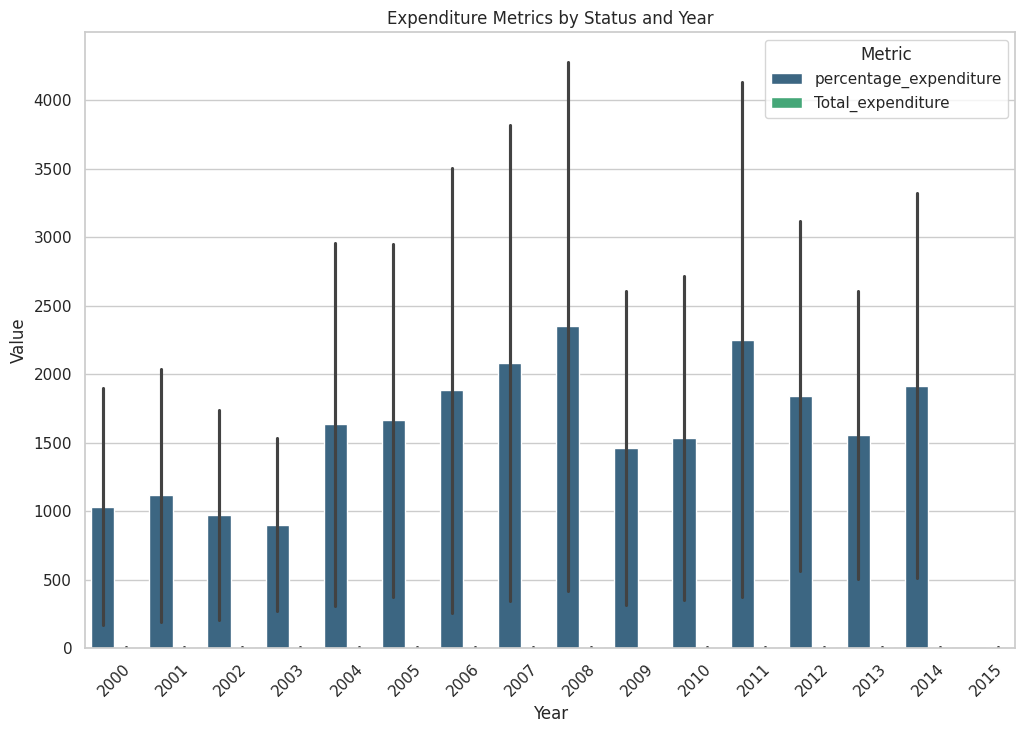

In [207]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Value', hue='Metric', data=plot_df, palette='viridis')
plt.title('Expenditure Metrics by Status and Year')
plt.xticks(rotation=45)

<Figure size 1200x800 with 0 Axes>

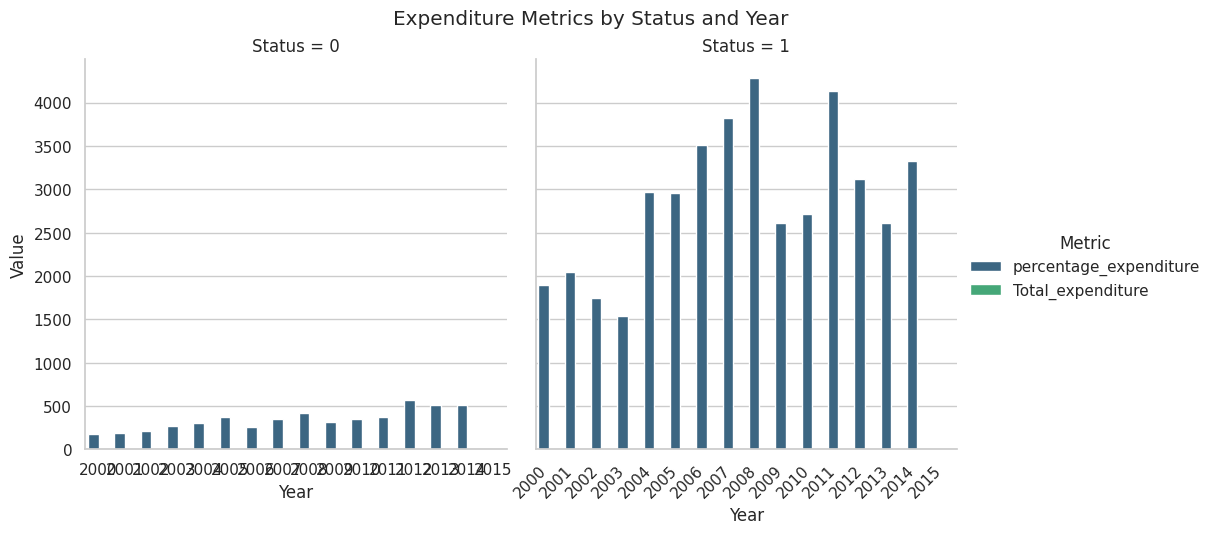

In [209]:
plt.figure(figsize=(12, 8))
# Use catplot for creating subplots based on 'Status'
sns.catplot(x='Year', y='Value', hue='Metric', data=plot_df,
            palette='viridis', col='Status', kind='bar')
plt.suptitle('Expenditure Metrics by Status and Year', y=1.02) # Adjust title position
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels

plt.show()

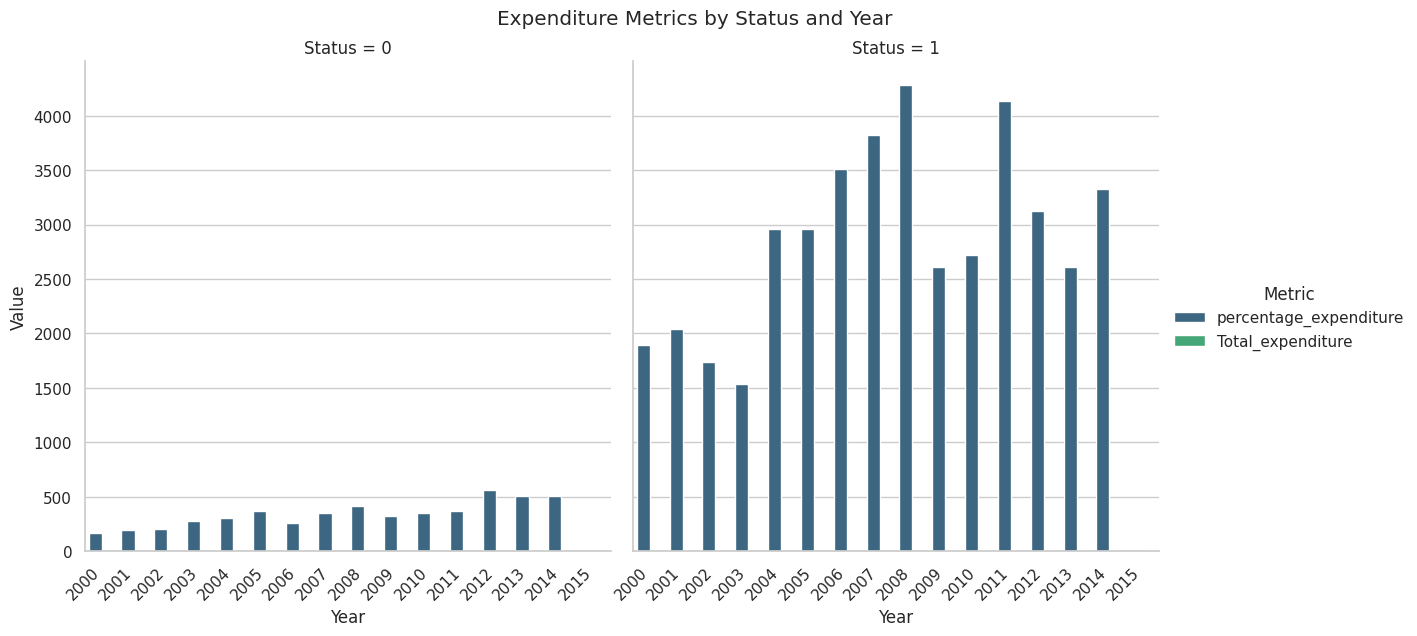

In [213]:
# Create plot with catplot - it returns a FacetGrid object
g = sns.catplot(x='Year', y='Value', hue='Metric', data=plot_df,
                palette='viridis', col='Status', kind='bar',
                height=6, aspect=1)

# Add a super title
g.fig.suptitle('Expenditure Metrics by Status and Year', y=1.02)

# Rotate x-axis labels on all subplots
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust the layout
#plt.tight_layout()
plt.show()

In [216]:
y[y<65].index

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927],
      dtype='int64', length=851)

In [217]:
len(y)

2928

In [218]:
len(y[y<65])

851

In [221]:
le_lessthan65 = pd.DataFrame([y[y<65]]).T
le_lessthan65.head()

Life_expectancy
1             59.9
2             59.9
3             59.5
4             59.2
5             58.8

In [224]:
combined_df = le_lessthan65.merge(x, left_on=le_lessthan65.index, right_index=True, how='left')

In [226]:
combined_df.head()

key_0  Life_expectancy  Country  Year  Status  Adult_Mortality  \
1      1             59.9        0  2014       0            271.0   
2      2             59.9        0  2013       0            268.0   
3      3             59.5        0  2012       0            272.0   
4      4             59.2        0  2011       0            275.0   
5      5             58.8        0  2010       0            279.0   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles   BMI  \
1             64     0.01               73.523582         62.0      492  18.6   
2             66     0.01               73.219243         64.0      430  18.1   
3             69     0.01               78.184215         67.0     2787  17.6   
4             71     0.01                7.097109         68.0     3013  17.2   
5             74     0.01               79.679367         66.0     1989  16.7   

   under-five_deaths  Polio  Total_expenditure  Diphtheria  HIV/AIDS  \
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   
5                102   66.0               9.20        66.0       0.1   

          GDP  Population  thinness__1-19_years  thinness_5-9_years  \
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   
5  553.328940   2883167.0                  18.4                18.4   

   Income_composition_of_resources  Schooling  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
5                            0.448        9.2

In [227]:
len(combined_df)

851

In [229]:
combined_df['Status'].value_counts()

Status
0    851
Name: count, dtype: int64

In [231]:
combined_df['Country'].value_counts()

Country
3      16
17     16
25     16
143    16
29     16
43     16
26     16
45     16
52     16
32     16
31     16
85     16
92     16
67     16
68     16
118    16
110    16
101    16
98     16
181    16
148    16
150    16
155    16
163    16
0      15
149    15
153    15
55     15
93     15
70     15
117    15
37     15
36     15
47     15
53     15
173    15
123    15
169    15
182    15
21     14
103    14
89     14
63     14
60     14
97     13
59     13
112    12
134    12
180    12
140    11
121    10
168     9
111     9
138     7
162     7
74      7
28      7
84      6
86      6
107     6
113     5
18      5
19      4
158     4
133     3
159     3
77      1
Name: count, dtype: int64

In [232]:
combined_df.groupby(['Country'])['percentage_expenditure'].mean(), combined_df.groupby('Status')['Total_expenditure'].mean()

(Country
 0       32.538809
 3      102.100268
 17      43.991956
 18      55.130323
 19       0.000000
 21     334.676381
 25      52.045581
 26      15.335498
 28      33.804705
 29      44.462300
 31      40.905543
 32      32.277320
 36      50.307712
 37       0.000000
 43       0.000000
 45       0.000000
 47      93.609867
 52     552.671538
 53       6.080759
 55      31.062680
 59     239.132228
 60       0.000000
 63      72.091470
 67      15.891283
 68      21.961645
 70      35.997211
 74      20.181366
 77      75.257998
 84     113.243864
 85      61.655464
 86      44.321986
 89       0.000000
 92      82.118913
 93      23.749893
 97      50.227967
 98      25.849706
 101     48.981177
 103     28.309294
 107     66.978573
 110     37.034152
 111      3.701876
 112    287.496210
 113     19.549452
 117     18.272498
 118     85.444275
 121     17.724227
 123     71.954233
 133    215.424053
 134     25.261618
 138     29.712457
 140     19.354105
 143     29.105579
 14

In [233]:
pct_exp = x.groupby(['Country', 'Year'])['percentage_expenditure'].mean().reset_index()
total_exp = x.groupby(['Country', 'Year'])['Total_expenditure'].mean().reset_index()


In [235]:
merged_df = pd.merge(pct_exp, total_exp, on=['Country', 'Year'])
merged_df.head()

Country  Year  percentage_expenditure  Total_expenditure
0        0  2000               10.424960               8.20
1        0  2001               10.574728               7.80
2        0  2002               16.887351               7.76
3        0  2003               11.089053               8.82
4        0  2004               15.296066               8.79

In [237]:
merged_df.nunique()

Country                    183
Year                        16
percentage_expenditure    2323
Total_expenditure          817
dtype: int64

In [245]:
merged_df.groupby('Year')['percentage_expenditure'].sum()

Year
2000     86714.692929
2001     94542.541466
2002     87253.391155
2003     90531.298063
2004    141337.516518
2005    150667.214067
2006    151666.066429
2007    174665.899731
2008    200531.888345
2009    131728.418648
2010    140584.513974
2011    188404.858470
2012    185099.325871
2013    160146.552610
2014    183349.996612
2015       436.254852
Name: percentage_expenditure, dtype: float64

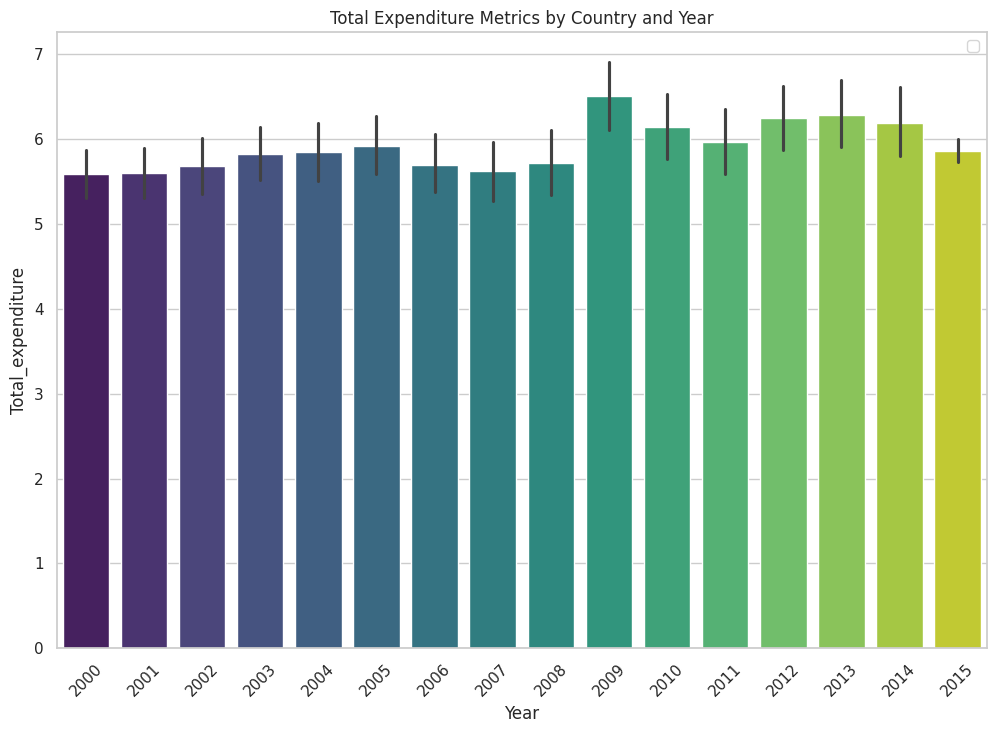

In [242]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Total_expenditure', data=merged_df, palette='viridis')
plt.title('Total Expenditure Metrics by Country and Year')
plt.xticks(rotation=45)
#Corrected the typo from 'legand' to 'legend'
plt.legend(loc='upper right')
plt.show()

Yes. The Country having lower life expectancy should increase its healthcare expenditure.